<a href="https://colab.research.google.com/github/SprIoan/NNColab/blob/main/Ergasia_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title  Intro Code

%%html
<html xmlns="http://www.w3.org/1999/xhtml">

<head>
	<meta http-equiv='Content-Type' content='text/html; charset=UTF-8' />
	
	<title>3D Text Tower</title>
	
	<style type="text/css">
	
		* { margin: 0; padding: 0; }
		body { background: #666; }
		h1,h2,h3,h4 { margin: 0 0 3px 0; }
	   h1 { color: white; font: bold 52px Helvetica, Arial, Sans-Serif;
		       text-shadow: 1px 1px #0F2520, 2px 2px #0F2520, 3px 3px #0F2520;
		       -webkit-transition: all 0.12s ease-out;
		       -moz-transition: all 0.12s ease-out;
		       -o-transition: all 0.12s ease-out;
		}
		h1:hover {
		    position: relative; top: -3px; left: -3px; 
		    text-shadow: 1px 1px #0F2520, 2px 2px #0F2520, 3px 3px #0F2520, 4px 4px #0F2520, 5px 5px #0F2520, 6px 6px #0F2520;
		}

		#page-wrap { width: 700px; margin: 0 auto; padding: 20px; text-align: center; }
		.about {  color: white; font: bold 30px Helvetica, Arial, Sans-Serif;
		       text-shadow: 1px 1px #0F2520, 1px 1px #0F2520, 1px 1px #0F2520;
		       -webkit-transition: all 0.12s ease-out;
		       -moz-transition: all 0.12s ease-out;
		       -o-transition: all 0.12s ease-out
           margin: 20px;
    }

    .about:hover {

       position: relative; top: -3px; left: -3px; 
		    text-shadow: 1px 1px #0F2520, 2px 2px #0F2520, 3px 3px #0F2520, 4px 4px #0F2520, 5px 5px #0F2520, 6px 6px #0F2520;

    }
	</style>
</head>

<body>

	<div id="page-wrap">

		<h1>Ομάδα 38</h1>

		<div id="about">
      <div></div>
		  <ul>
        <br>
        <div class="about">Χαδουμέλλης Ανδρέας (03116641)</div>
        <br>
		    <div class="about">Γρηγοράτος Σπυρίδων (03116161)</div>
        <br>
		    <div class="about">Ιωάννου Σπυρίδων (03116110)</div>
      </ul>
			
	</div>
	
  </div>
</body>

</html>

In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package

     |████████████████████████████████| 1.5MB 6.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 6.8 MB 6.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 14.5 MB 78 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.4)


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_fscore_support
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Μικρό Dataset: S10 - [Statlog (Veichle Silhouettes)](http://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29)**


##Βασικές Πληροφορίες

1. Με μία σύντομη επισκόπηση βλέπουμε πως το dataset μας αποτελείται από δεδομένα που αφορούν οχήματα διαφορετικών ειδών. Συγκεκριμένα, υπάρχουν 4 κατηγορίες στις οποίες ανήκουν τα αντικείμενα: bus, opel, saab, van. Τα χαρακτηριστικά του κάθε αντικειμένου είναι διάφορα χαρακτηριστικά τα οποία έχουν εξαχθεί από εικόνες που αντιστοιχούν σε οχήματα των παραπάνω κατηγοριών. Τα δεδομένα του dataset βρίσκονται στο αρχείο "small_all_data.data".

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Neural Networks/Ασκησεις/1η Εργασία/'
small_data_path = path+'small_all_data.data'
df = pd.read_csv(small_data_path, sep=' ', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


2. Έχουμε 846 δείγματα. Κάθε δείγμα έχει 18 χαρακτηριστικά, τα οποία όπως αναφέραμε είναι διάφορα χαρακτηριστικά που εξήχθησαν από τις εικόνες οχημάτων που ανήκουν σε αυτές τις κατηγορίες. Όλα τα χαρακτηριστικά είναι αριθμητικά. Πρόκειται για διάφορες μετρικές (πχ. κυκλικότητα, ορθογωνιότητα, διάφοροι λόγοι, διασπορές κτλ.) συνεπώς θεωρούμε πως είναι όλα διατεταγμένα. 

3. Στα αρχεία του dataset δεν υπήρχε κάποια αρίθμηση ή κεφαλίδα, μόνο τα δεδομένα.

4. Οι ετικέτες των κλάσεων είναι οι 4 που αναφέρθηκαν παραπάνω (bus, opel, saab, van) και βρίσκονται στην τελευταία κολόνα. 

5. Δε χρειάστηκε κάποια μετατροπή στα text αρχεία, μόνο η συνένωσή τους σε ένα, η οποία έγινε χειροκίνητα.

6. Όσον αφορά τις τιμές των χαρακτηριστικών δεν υπήρχαν απουσιάζουσες τιμές (lucky us) 

In [ ]:
labels_df = df.iloc[:,[-1]] #Τα labels βρισκονται στην τελευταία στήλη
features_df = df.iloc[:,:18] #18 attributes, στις στήλες 0-17.

np_features=features_df.values #Μετατρέπουμε το dataframe σε np array
print(np_features.shape)

(846, 18)


Όπως βλέπουμε στο output του παρακάτω κελιού κώδικα, τα αντικείμενα μας ανήκουν στις κατηγορίες bus, opel, saab, van.
Θα χρησιμοποιήσουμε το εξής mapping:

0:bus 

1:opel

2:saab

3:van


In [ ]:
unique_labels = np.unique(labels_df.values) #Παίρνουμε τη λίστα με τα ονόματα των κλάσεων των αντικειμένων μας.
print(unique_labels)
mapping = {'bus' : 0, 'opel' : 1, 'saab' : 2, 'van' : 3}
np_labels =  labels_df.replace(mapping).values.flatten()
print(np_labels)
print(np_labels.shape)

['bus' 'opel' 'saab' 'van']
[3 3 2 3 0 0 0 3 3 2 3 2 0 3 0 1 3 0 2 1 0 3 0 0 2 3 2 2 0 2 3 2 1 1 1 3 0
 3 2 0 1 3 3 2 2 3 3 0 3 2 2 2 1 0 0 3 2 3 1 3 1 1 3 0 0 1 0 1 3 0 1 1 1 1
 3 1 2 2 0 0 0 0 3 1 0 0 3 3 0 1 2 1 2 3 0 1 2 0 1 0 0 3 3 3 0 2 1 1 0 0 3
 3 1 1 3 3 1 2 0 0 2 3 3 2 3 3 0 0 3 0 2 2 2 3 1 3 3 3 2 3 2 0 1 0 1 1 3 0
 2 3 2 0 1 2 3 0 1 3 2 1 1 1 2 2 1 1 2 2 0 3 1 0 3 0 3 0 1 0 0 3 2 1 0 2 2
 0 0 1 1 1 1 3 2 0 2 0 2 0 0 0 3 2 1 1 3 3 1 0 0 1 1 3 0 0 1 1 2 1 0 3 1 3
 0 0 2 3 2 3 2 2 3 2 0 2 3 3 0 0 1 0 1 1 0 2 3 3 0 2 1 2 3 1 3 0 3 2 2 1 2
 1 2 2 3 3 2 0 0 2 3 3 0 2 3 3 0 0 0 1 2 0 1 0 0 2 3 2 0 3 1 2 3 3 0 3 0 0
 0 2 2 0 2 1 0 3 0 0 2 1 1 1 2 3 0 1 0 3 3 2 3 0 2 0 0 2 2 0 1 1 3 2 3 1 1
 0 0 2 3 0 3 0 0 1 2 1 1 0 2 1 3 1 1 2 3 0 2 1 0 2 1 1 2 2 2 3 1 2 3 2 0 1
 0 0 3 0 3 0 2 2 2 1 1 0 0 1 1 3 2 3 3 1 0 3 3 0 2 1 0 0 0 3 2 1 1 3 1 0 1
 2 0 2 2 1 0 1 3 1 0 0 0 2 3 1 2 0 1 1 1 1 2 3 2 0 2 0 2 3 3 1 1 2 2 3 3 1
 0 3 2 1 0 3 0 1 1 0 2 0 3 3 1 2 3 1 1 1 0 0 0 1 2 3 3 1 0 1 1 2 1 3 0 0

In [ ]:
from collections import Counter
instances_per_class = Counter(np_labels)
print(instances_per_class)

Counter({0: 218, 2: 217, 1: 212, 3: 199})


7. Βλεπουμε πως κάθε κλάση έχει τα παρακάτω στιγμιότυπα επί του συνόλου:

  bus: 218

  opel: 212

  saab: 217

  van: 199

  Το dataset μας είναι ισορροπημένο, αφού ${\frac {\text{instances_max}}{\text{instances_min}}} = {\frac {218}{199}}=1.095 < 1.5$

8. Χωρίζουμε το dataset σε train και test set. Δεν υπάρχουν απουσιάζουσες τιμές ή μη διατεταγμένεα χαρακτηριστικά, συνεπώς προχωράμε κατευθείαν στο διαχωρισμό (20% για test set).

In [ ]:
from sklearn.model_selection import train_test_split

# Split our data
# Βάζουμε σταθερό random state για να μην αλλάζουν κάθε φορά τα αποτελέσματά μας
train_data, test_data, train_labels, test_labels = train_test_split(np_features, np_labels, test_size=0.2, random_state=38)
instances_per_class = Counter(train_labels)
print(instances_per_class)

Counter({0: 178, 2: 173, 3: 165, 1: 160})


##Ταξινόμηση
Οι ταξινομητές που εξετάζουμε σε αυτό το dataset είναι οι: dummy, Gaussian Naive Bayes, kNN.

###Baseline Classification

In [ ]:
#Xρησιμοποιούμε την παρακάτω συνάρτηση για να απεικονίσουμε χρωματικά το confusion matrix 

def view_conf_matrix(test_labels, predictions, label_names,title=None):
  m = confusion_matrix(test_labels, predictions)
  fix, ax = plt.subplots(figsize=(6,6))
  sns.heatmap(m.T, square=True, annot=True, fmt='d',cbar=False, xticklabels=label_names,yticklabels=label_names,cmap='Blues')
  ax.set_xlabel("True Labels", size=15)
  ax.set_ylabel("Predicted labels",size=15)
  plt.title(title, size=18)

####Dummy Classifiers
Θα χρησιμοποιήσυμε όλες τις γνωστές στρατηγικές επιλογής για τους dummy classifiers

Dummy Uniform Classifier

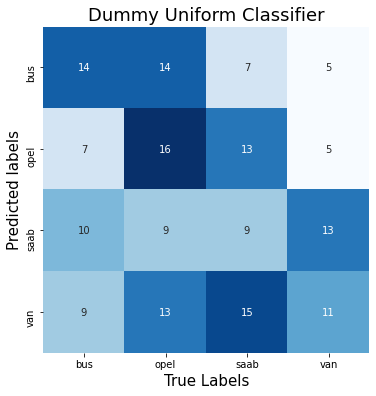

In [ ]:
dummy_uniform = DummyClassifier(strategy='uniform')
dummy_uniform_model = dummy_uniform.fit(train_data, train_labels)
dummy_uniform_preds = dummy_uniform.predict(test_data)
view_conf_matrix(test_labels, dummy_uniform_preds, unique_labels,title="Dummy Uniform Classifier" )

In [ ]:
f1_micro_du = precision_recall_fscore_support(test_labels, dummy_uniform_preds, average='micro')[2]
f1_macro_du = precision_recall_fscore_support(test_labels, dummy_uniform_preds, average='macro')[2]

print("Dummy Uniform Classifier:\t f1_micro:"+str(f1_micro_du)[:5]+"\t f1_macro:"+str(f1_macro_du)[:5]+'\n')

print(classification_report(test_labels, dummy_uniform_preds , target_names=unique_labels))

Dummy Uniform Classifier:	 f1_micro:0.294	 f1_macro:0.293

              precision    recall  f1-score   support

         bus       0.35      0.35      0.35        40
        opel       0.39      0.31      0.34        52
        saab       0.22      0.20      0.21        44
         van       0.23      0.32      0.27        34

    accuracy                           0.29       170
   macro avg       0.30      0.30      0.29       170
weighted avg       0.30      0.29      0.30       170



Dummy Most Frequent Classifier

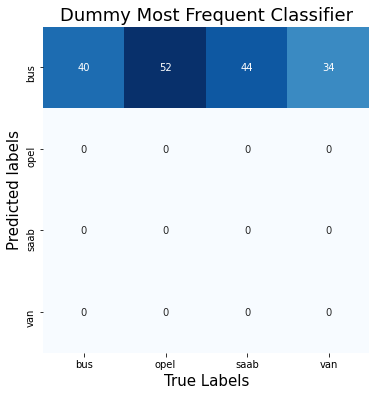

In [ ]:
dummy_mostFrequent = DummyClassifier(strategy='most_frequent')
dummy_mostFrequent_model = dummy_mostFrequent.fit(train_data, train_labels)
dummy_mostFrequent_preds = dummy_mostFrequent.predict(test_data)
view_conf_matrix(test_labels, dummy_mostFrequent_preds, unique_labels,title="Dummy Most Frequent Classifier" )

In [ ]:
f1_micro_dmf = precision_recall_fscore_support(test_labels, dummy_mostFrequent_preds, average='micro')[2]
f1_macro_dmf = precision_recall_fscore_support(test_labels, dummy_mostFrequent_preds, average='macro')[2]

print("Dummy Most Frequent Classifier:\t f1_micro:"+str(f1_micro_dmf)[:5]+"\t f1_macro:"+str(f1_macro_dmf)[:5]+'\n')

print(classification_report(test_labels, dummy_mostFrequent_preds , target_names=unique_labels))

Dummy Most Frequent Classifier:	 f1_micro:0.235	 f1_macro:0.095

              precision    recall  f1-score   support

         bus       0.24      1.00      0.38        40
        opel       0.00      0.00      0.00        52
        saab       0.00      0.00      0.00        44
         van       0.00      0.00      0.00        34

    accuracy                           0.24       170
   macro avg       0.06      0.25      0.10       170
weighted avg       0.06      0.24      0.09       170



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Constant Classifier
Επιλέγουμε ο constant classifier να ταξινομεί όλα τα δείγματα στην πιο πολυπληθή κλάση σε όλο το σύνολο (train και test), η οποία είναι η bus (0)

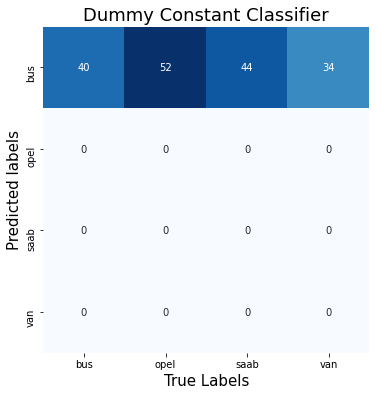

In [ ]:
dummy_const = DummyClassifier(strategy='constant',constant=0 )
dummy_const_model = dummy_const.fit(train_data, train_labels)
dummy_const_preds = dummy_const.predict(test_data)
view_conf_matrix(test_labels, dummy_const_preds, unique_labels,title="Dummy Constant Classifier" )

In [ ]:
f1_micro_dc = precision_recall_fscore_support(test_labels, dummy_const_preds, average='micro')[2]
f1_macro_dc = precision_recall_fscore_support(test_labels, dummy_const_preds, average='macro')[2]
print("Dummy Most Frequent Classifier:\t f1_micro:"+str(f1_micro_dc)[:5]+"\t f1_macro:"+str(f1_macro_dc)[:5]+'\n')
print(classification_report(test_labels, dummy_const_preds , target_names=unique_labels))

Dummy Most Frequent Classifier:	 f1_micro:0.235	 f1_macro:0.095

              precision    recall  f1-score   support

         bus       0.24      1.00      0.38        40
        opel       0.00      0.00      0.00        52
        saab       0.00      0.00      0.00        44
         van       0.00      0.00      0.00        34

    accuracy                           0.24       170
   macro avg       0.06      0.25      0.10       170
weighted avg       0.06      0.24      0.09       170



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dummy Stratified

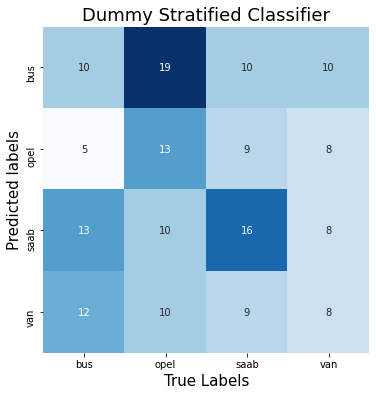

In [ ]:
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified_model = dummy_stratified.fit(train_data, train_labels)
dummy_stratified_preds = dummy_stratified.predict(test_data)
view_conf_matrix(test_labels, dummy_stratified_preds, unique_labels,title="Dummy Stratified Classifier" )


In [ ]:
f1_micro_ds = precision_recall_fscore_support(test_labels, dummy_stratified_preds, average='micro')[2]
f1_macro_ds = precision_recall_fscore_support(test_labels, dummy_stratified_preds, average='macro')[2]

print("Dummy Stratified Classifier:\t f1_micro:"+str(f1_micro_ds)[:5]+"\t f1_macro:"+str(f1_macro_ds)[:5]+'\n')

print(classification_report(test_labels, dummy_stratified_preds , target_names=unique_labels))

Dummy Stratified Classifier:	 f1_micro:0.276	 f1_macro:0.273

              precision    recall  f1-score   support

         bus       0.20      0.25      0.22        40
        opel       0.37      0.25      0.30        52
        saab       0.34      0.36      0.35        44
         van       0.21      0.24      0.22        34

    accuracy                           0.28       170
   macro avg       0.28      0.27      0.27       170
weighted avg       0.29      0.28      0.28       170



Γενικα βλεπουμε πως οι dummy classifiers έχουν πολύ χαμηλά ποσοστά επιτυχίας και γενικα δεν εχουν και πολυ νοημα, παρα μονο στο να καταλαβουμε ποσο γτπ ειναι


#### Gaussian Naive Bayes Classifier

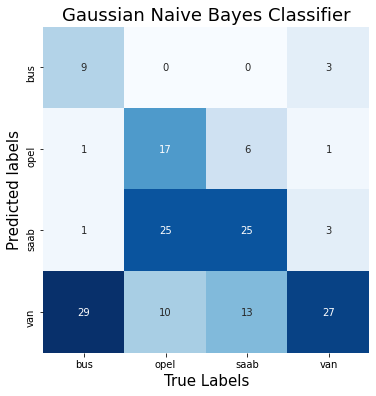

In [ ]:
gnb = GaussianNB()
gnb_model = gnb.fit(train_data, train_labels)
gnb_preds = gnb.predict(test_data)
view_conf_matrix(test_labels, gnb_preds, unique_labels,title="Gaussian Naive Bayes Classifier" )

In [ ]:
f1_micro_gnb = precision_recall_fscore_support(test_labels, gnb_preds, average='micro')[2]
f1_macro_gnb = precision_recall_fscore_support(test_labels, gnb_preds, average='macro')[2]

print("Gaussian Naive Bayes Classifier:\t f1_micro:"+str(f1_micro_gnb)[:5]+"\t f1_macro:"+str(f1_macro_gnb)[:5]+'\n')

print(classification_report(test_labels, gnb_preds , target_names=unique_labels))

Gaussian Naive Bayes Classifier:	 f1_micro:0.458	 f1_macro:0.443

              precision    recall  f1-score   support

         bus       0.75      0.23      0.35        40
        opel       0.68      0.33      0.44        52
        saab       0.46      0.57      0.51        44
         van       0.34      0.79      0.48        34

    accuracy                           0.46       170
   macro avg       0.56      0.48      0.44       170
weighted avg       0.57      0.46      0.44       170



#### kNN Classifier

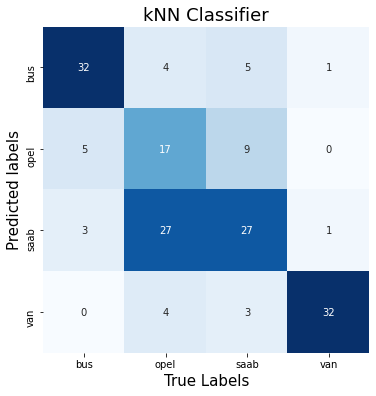

In [ ]:
knn = KNeighborsClassifier()  #Η default τιμη του k είναι 5. Θα βελτιστοποιηθεί σε επόμενο βήμα
knn_model = knn.fit(train_data, train_labels)
knn_preds = knn.predict(test_data)
view_conf_matrix(test_labels, knn_preds, unique_labels,title="kNN Classifier" )

In [ ]:
f1_micro_knn = precision_recall_fscore_support(test_labels, knn_preds, average='micro')[2]
f1_macro_knn = precision_recall_fscore_support(test_labels, knn_preds, average='macro')[2]

print("kΝΝ Classifier:\t f1_micro:"+str(f1_micro_knn)[:5]+"\t f1_macro:"+str(f1_macro_knn)[:5]+'\n')

print(classification_report(test_labels, knn_preds , target_names=unique_labels))

kΝΝ Classifier:	 f1_micro:0.635	 f1_macro:0.649

              precision    recall  f1-score   support

         bus       0.76      0.80      0.78        40
        opel       0.55      0.33      0.41        52
        saab       0.47      0.61      0.53        44
         van       0.82      0.94      0.88        34

    accuracy                           0.64       170
   macro avg       0.65      0.67      0.65       170
weighted avg       0.63      0.64      0.62       170



#### Σύγκριση και σχολιασμός Αποτελεσμάτων

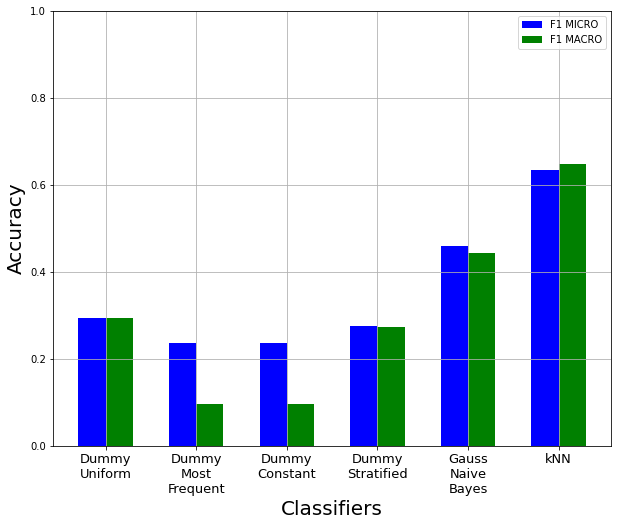

In [ ]:
classifiers=["Dummy\nUniform","Dummy\nMost\nFrequent","Dummy\nConstant","Dummy\nStratified","Gauss\nNaive\nBayes","kNN"]

f1_micros_def=[f1_micro_du, f1_micro_dmf, f1_micro_dc, f1_micro_ds, f1_micro_gnb, f1_micro_knn]
f1_macros_def=[f1_macro_du, f1_macro_dmf, f1_macro_dc, f1_macro_ds, f1_macro_gnb, f1_macro_knn]

fig, ax = plt.subplots(figsize = (10,8))
ax.grid(True)
xax=np.arange(len(classifiers))
ax.set_xticks(xax)
ax.set_xticklabels(classifiers, size=13)
ax.set_xlabel('Classifiers', size=20)
ax.set_ylim(0,1)
ax.set_ylabel("Accuracy", size=20)

ax.bar(xax-0.3,f1_micros_def, label='F1 MICRO',align='edge',width=0.3, color='blue' )
ax.bar(xax, f1_macros_def, label='F1 MACRO',align='edge',width=0.3, color='green' )
plt.legend()


Όπως εύκολα παρατηρούμε, ο kNN έχει πολύ καλύτερες επιδόσεις από όλους τους ταξινομητές.

### Βελτιστοποίηση Ταξινομητών

#### Βελτιστοποίηση Dummy Classifiers

Just kidding, δε μπορεί να γίνει κάποια βελτιστοποίηση και δε θα αναλωθουμε προσπαθωντας να βελτιώσουμε τους dummies. Το όνομά τους δεν το πήραν τυχαια :)

In [ ]:
f1_micros_opt=[f1_micro_du, f1_micro_dmf, f1_micro_dc, f1_micro_ds]
f1_macros_opt=[f1_macro_du, f1_macro_dmf, f1_macro_dc, f1_macro_ds]

#### Βελτιστοποίηση Gaussian Naive Bayes Classifier  
Ο GNB Classifier δεν έχει κάποια υπερπαράμετρο προς βελτιστοποίηση, οπότε προσπαθούμε να πάρουμε καλύτερα αποτελέσματα αποκλειστικά μέσω του preprocessing

#####**ΔΟΚΙΜΗ 1: Μείωση της διαστατικότητας των δεδομένων με επιλογή χαρακτηριστικών έπειτα απο min-max κανονικοποίηση:**  
Η πρώτη δοκιμή που κάναμε ήταν να εφαρμόσουμε κανονικοποίηση min-max στα δεδομένα και στη συνέχεια να κάνουμε επιλογή χαρακτηριστικών χρησιμοποιώντασ Variance Threshold. Η υψηλότερη απόδοση που καταφέραμε να πάρουμε ήταν της τάξης του 50%, συνεπώς δεν υπήρξε κάποια βελτίωση.






Threshold=0. Keeping 18 attributes.
Threshold=0.01. Keeping 16 attributes.
Threshold=0.02. Keeping 15 attributes.
Threshold=0.03. Keeping 14 attributes.
Threshold=0.05. Keeping 5 attributes.
Threshold=0.06. Keeping 2 attributes.


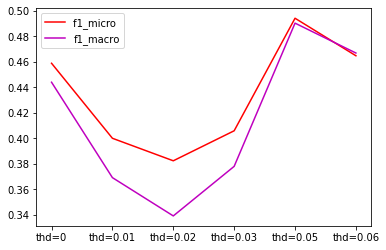

In [ ]:
#ΔΟΚΙΜΗ ΜΕΙΩΣΗΣ ΔΙΑΣΤΑΣΕΩΝ ΜΕ ΕΠΙΛΟΓΗ ΜΕΤΑΒΛΗΤΩΝ EΠΕΙΤΑ ΑΠΟ ΚΑΝΟΝΙΚΟΠΟΙΗΣΗ (Δεν πηγε και πολυ καλα αυτο)

min_max_scaler = preprocessing.MinMaxScaler()
train_data_norm = min_max_scaler.fit_transform(train_data)
test_data_norm = min_max_scaler.transform(test_data)

f1_micros=[]
f1_macros=[]
thds = [0,0.01,0.02,0.03,0.05,0.06]
for threshold in thds:
  selector = VarianceThreshold(threshold=threshold)
  train_data_reduced = selector.fit_transform(train_data_norm)
  mask = selector.get_support()
  print("Threshold="+str(threshold)+". Keeping "+str(list(mask).count(True))+" attributes.")
  train_data_reduced = train_data_norm[:,mask]
  test_data_reduced = test_data_norm[:,mask]
  gnb_model_opt = gnb.fit(train_data_reduced, train_labels)
  gnb_preds_opt = gnb.predict(test_data_reduced)
  f1_micros.append(precision_recall_fscore_support(test_labels, gnb_preds_opt, average='micro')[2])
  f1_macros.append(precision_recall_fscore_support(test_labels, gnb_preds_opt, average='macro')[2])


fig, ax = plt.subplots()
xax=range(len(thds))
ax.set_xticks(xax)
ax.set_xticklabels(["thd="+str(i) for i in thds])
ax.plot(xax, f1_micros, label='f1_micro ', color='red')
ax.plot(xax, f1_macros, label='f1_macrο', color='m')
plt.legend()

#####**ΔΟΚΙΜΗ 2: Μείωση της διαστατικότητας των δεδομένων με την τεχνική PCA**  
Eδώ αυτό που καταφέραμε είναι αρκετά παράξενο. Ενώ η τεχνική PCA αποσκοπεί στη μείωση της διαστατικότητας, εν τέλει, τα καλύτερα αποτελέσματα τα πήραμε όταν εφαρμόσαμε μετασχηματισμό που οδηγούσε σε ίδιο αριθμό διαστάσεων με τον αρχικό. Αυτό που ενδεχομένως έγινε, είναι ότι η μέθοδος παρήγαγε διαφορετικά 18 χαρακτηριστικά από τα αρχικά 18 που είχαν τα δείγματα. Η βελτίωση είναι σημαντική, καθώς από accuracy της ταξης του 50%, πήγαμε σε τάξη του 70%.

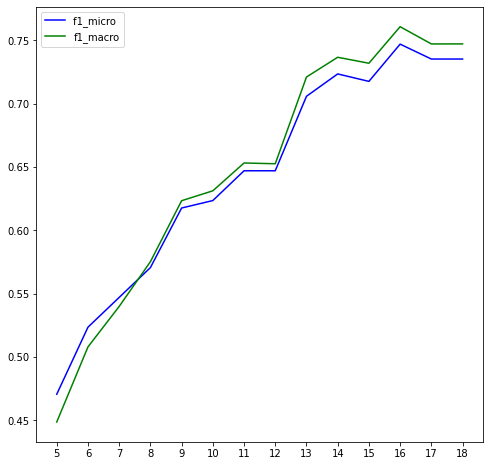

In [ ]:
#ΔΟΚΙΜΗ ΜΕΙΩΣΗΣ ΔΙΑΣΤΑΣΕΩΝ ΜΕ ΕΞΑΓΩΓΗ ΧΑΡΑΚΤΗΡΙΣΤΙΚΩΝ
f1_micros=[]
f1_macros=[]
nus = list(range(5,19))

for n in nus:
  pca = PCA(n_components=n)
  train_data_reduced = pca.fit_transform(train_data)
  test_data_reduced = pca.transform(test_data)
  gnb_model_opt = gnb.fit(train_data_reduced, train_labels)
  gnb_preds_opt = gnb.predict(test_data_reduced)
  f1_micros.append(precision_recall_fscore_support(test_labels, gnb_preds_opt, average='micro')[2])
  f1_macros.append(precision_recall_fscore_support(test_labels, gnb_preds_opt, average='macro')[2])

fig, ax = plt.subplots(figsize=(8,8))
xax=range(len(nus))
ax.set_xticks(xax)
ax.set_xticklabels(nus)
ax.plot(xax, f1_micros, label='f1_micro ', color='b')
ax.plot(xax, f1_macros, label='f1_macro', color='g')
plt.legend()

In [ ]:
f1_micros_opt.append(f1_micros[-3])
f1_macros_opt.append(f1_macros[-3])

#### Bελτιστοποίηση kNN Classifier
Εδώ, εκτός από τους διάφορους μετασχηματισμούς κατά την προεπεξεργασία των δεδομένων, θα βελτιστοποιήσουμε και την παράμετρο k του kNN χρησιμοποιώντας 10-fold cross validation. **NA TΡΕΧΤΕΙ 1 ΦΟΡΑ ΠΡΙΝ ΤΗΝ ΥΠΟΒΟΛΗ ΚΑΙ ΝΑ ΓΙΝΟΥΝ EDIT ΤΑ ΣΧΟΛΙΑ**

#####**ΔΟΚΙΜΗ 1: Εφαρμογή κανονικοποίησης min-max και στη συνεχεια επιλογή χαρακτηριστικών με VarianceThreshold:**  
Κανονικοποιούμε το dataset με τη μέθοδο min-max και στη συνέχεια δοκιμάζουμε τους εξής συνδυασμούς:  
- $k \in(1,20)$ 
- $thd \in (0,0.06)$ με βήμα $0.01$

Πρώτα κάναμε τη διαδικασία χειροκίνητα και παρουσιάζουμε γραφικά τα αποτελέσματα και στη συνέχεια επαναλαμβάνουμε τη διαδικασία κάνοντας pipeline και CVGridSearch.

In [ ]:
#ΔΟΚΙΜΗ ΜΕΙΩΣΗΣ ΔΙΑΣΤΑΣΕΩΝ ΜΕ ΕΠΙΛΟΓΗ ΜΕΤΑΒΛΗΤΩΝ EΠΕΙΤΑ ΑΠΟ ΚΑΝΟΝΙΚΟΠΟΙΗΣΗ

#Aρχικά κάνουμε τη διαδικασία χειροκίνητα
min_max_scaler = preprocessing.MinMaxScaler()
train_data_norm = min_max_scaler.fit_transform(train_data)
test_data_norm = min_max_scaler.transform(test_data)

f1_micros=[]
f1_macros=[]

thds = [0,0.01,0.02,0.03,0.05,0.06]
ks = list(range(1,21)) #Θα μπορούσαμε να πάρουμε μόνο τα περιττά k, αλλά έχουμε 4 κλάσεις, όχι 2 οπότε οι ισοπαλίες δε θα είναι συχνές.

for threshold in thds:
  selector = VarianceThreshold(threshold=threshold)
  train_data_reduced = selector.fit_transform(train_data_norm)
  mask = selector.get_support()
  print("Threshold="+str(threshold)+". Keeping "+str(list(mask).count(True))+" attributes.")
  train_data_reduced = train_data_norm[:,mask]
  test_data_reduced = test_data_norm[:,mask]

  thd_f1_micros=[]
  thd_f1_macros=[]

  for k in ks:
    knn_opt = KNeighborsClassifier(n_neighbors=k)
    f1_micro = cross_val_score(knn_opt, train_data_reduced, train_labels, cv=10, scoring='f1_micro')[2]
    f1_macro = cross_val_score(knn_opt, train_data_reduced, train_labels, cv=10, scoring='f1_macro')[2]
    print("\t k="+str(k)+". f1_micro="+str(f1_micro)[:6]+" f1_macro="+str(f1_macro)[:6])
    thd_f1_micros.append(f1_micro)
    thd_f1_macros.append(f1_macro)
  
  f1_micros.append(thd_f1_micros)
  f1_macros.append(thd_f1_macros)

Threshold=0. Keeping 18 attributes.
	 k=1. f1_micro=0.7058 f1_macro=0.7005
	 k=2. f1_micro=0.6764 f1_macro=0.6695
	 k=3. f1_micro=0.6617 f1_macro=0.6458
	 k=4. f1_micro=0.6617 f1_macro=0.6461
	 k=5. f1_micro=0.6764 f1_macro=0.6605
	 k=6. f1_micro=0.6323 f1_macro=0.6187
	 k=7. f1_micro=0.6323 f1_macro=0.6140
	 k=8. f1_micro=0.6617 f1_macro=0.6427
	 k=9. f1_micro=0.6911 f1_macro=0.6775
	 k=10. f1_micro=0.6911 f1_macro=0.6774
	 k=11. f1_micro=0.6617 f1_macro=0.6477
	 k=12. f1_micro=0.6911 f1_macro=0.6710
	 k=13. f1_micro=0.6764 f1_macro=0.6547
	 k=14. f1_micro=0.6323 f1_macro=0.6047
	 k=15. f1_micro=0.6764 f1_macro=0.6538
	 k=16. f1_micro=0.6911 f1_macro=0.6735
	 k=17. f1_micro=0.6470 f1_macro=0.6102
	 k=18. f1_micro=0.6764 f1_macro=0.6442
	 k=19. f1_micro=0.6617 f1_macro=0.6276
	 k=20. f1_micro=0.6470 f1_macro=0.6071
Threshold=0.01. Keeping 16 attributes.
	 k=1. f1_micro=0.6911 f1_macro=0.6823
	 k=2. f1_micro=0.6764 f1_macro=0.6695
	 k=3. f1_micro=0.6764 f1_macro=0.6558
	 k=4. f1_micro=0

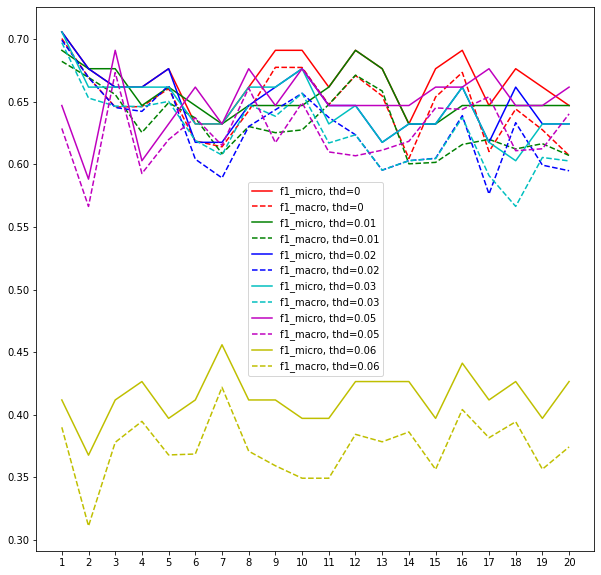

In [ ]:
colors=['r','g','b','c','m','y']
fig, ax = plt.subplots(figsize=(10,10))
xax=ks
ax.set_xticks(xax)
#ax.set_ylim(0,1)
ax.set_xticklabels(xax)
for i in range(len(f1_micros)):
  ax.plot(xax, f1_micros[i],colors[i], label='f1_micro, thd='+str(thds[i]))
  ax.plot(xax, f1_macros[i],colors[i]+"--", label='f1_macro, thd='+str(thds[i]))
plt.legend()

Xρόνος fit: 8.905
Χρόνος predict: 0.007
Bέλτιστες υπερπαράμετροι:
 {'kNN__n_neighbors': 1, 'selector__threshold': 0}


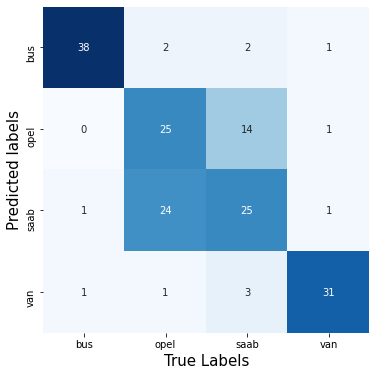

In [ ]:
#Στη συνέχεια κάνουμε την ίδια διαδικασία μέσω της χρήσης pipeline+GridSearchCV
#Xρησιμοποιούμε μονο 1 estimator με μετρική απόδοσης f1 micro γιατι εν τελει βγαζει το ιδιο αποτελεσμα με την f1 macro
import time

selector=VarianceThreshold()
min_max_scaler = preprocessing.MinMaxScaler()
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('scaler', min_max_scaler),('selector', selector), ('kNN', knn)])
start_fit = time.time()
estimator1 = GridSearchCV(pipe, dict(selector__threshold=thds, kNN__n_neighbors=ks), cv=10, scoring='f1_micro', n_jobs=-1)
estimator1.fit(train_data, train_labels)
fit_time = time.time()-start_fit
start_pred = time.time()
preds = estimator1.predict(test_data)
pred_time = time.time() - start_pred

print("Xρόνος fit: "+str(fit_time)[:5]+"\nΧρόνος predict: "+str(pred_time)[:5])
print("Bέλτιστες υπερπαράμετροι:\n",estimator1.best_params_)
view_conf_matrix(test_labels, preds, unique_labels)


Βλέπουμε πως το GridSearchCV προτείνει τις τιμές k=1, thd=0. Οι τιμές αυτές όπως μπορούμε να δούμε από το παραπάνω διάγραμμα δεν είναι οι βέλτιστες, αλλά είναι κοντά στις βέλτιστες. Θα ορίσουμε και έναν τρίτο estimator με τις βέλτιστες τιμές που προκύπτουν από το διάγραμμα, δηλαδή k=1, thd=0.02 και θα συγκρίνουμε τις αποδόσεις των 2 συνδυασμών στο test set.

In [ ]:
knn_opt_preds = estimator1.best_estimator_.predict(test_data)

f1_micro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='micro')[2]
f1_macro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the CVGS:")
print("f1_micro:",f1_micro_knn_opt1 ,"f1_macro:",f1_macro_knn_opt1)

Results of the optimal knn classifier as indicated by the CVGS:
f1_micro: 0.7 f1_macro: 0.7177927466649863


In [ ]:
estimator3 = GridSearchCV(pipe, dict(selector__threshold=[0.02], kNN__n_neighbors=[1]), cv=10, scoring='f1_micro', n_jobs=-1)
estimator3.fit(train_data, train_labels)
preds3 = estimator3.predict(test_data)
f1_micro_knn_opt3 = precision_recall_fscore_support(test_labels, preds3, average='micro')[2]
f1_micro_knn_opt3 = precision_recall_fscore_support(test_labels, preds3, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the graph results:")
print("f1_micro:",f1_micro_knn_opt3 ,"f1_macro:",f1_micro_knn_opt3)

Results of the optimal knn classifier as indicated by the graph results:
f1_micro: 0.6920286091964876 f1_macro: 0.6920286091964876


Παρατηρούμε πως πράγματι ο συνδυασμός υπερπαραμέτρων του CVGS δίνει ελαφρώς καλύτερα αποτελέσματα στο test set

**ΔΟΚΙΜΗ 1.5**

Xρόνος fit: 2.799
Χρόνος predict: 0.006
Bέλτιστες υπερπαράμετροι:
 {'kNN__n_neighbors': 10, 'selector__threshold': 50}


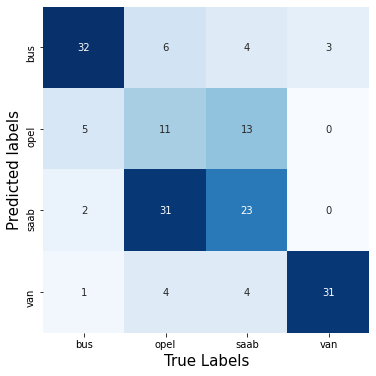

In [ ]:
thds=[0, 50, 80, 100, 150, 500]
kappas = [10, 20, 30, 40, 50, 60, 70, 80]

selector=VarianceThreshold()
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('selector', selector), ('kNN', knn)])
estimator1 = GridSearchCV(pipe, dict(selector__threshold=thds, kNN__n_neighbors=kappas), cv=10, scoring='f1_micro', n_jobs=-1)
start_fit = time.time()
estimator1.fit(train_data, train_labels)
fit_time = time.time() - start_fit
pred_start = time.time()
preds = estimator1.predict(test_data)
pred_time = time.time()-pred_start

print("Xρόνος fit: "+str(fit_time)[:5]+"\nΧρόνος predict: "+str(pred_time)[:5])
print("Bέλτιστες υπερπαράμετροι:\n",estimator1.best_params_)
view_conf_matrix(test_labels, preds, unique_labels)

Xρόνος fit: 2.799
Χρόνος predict: 0.006
Bέλτιστες υπερπαράμετροι:
 {'kNN__n_neighbors': 8, 'selector__threshold': 55}


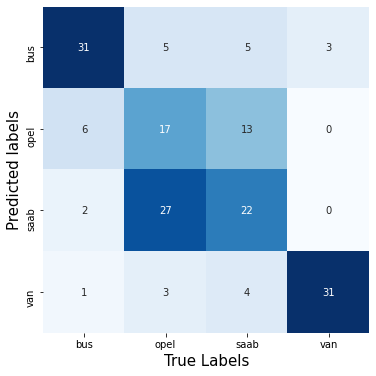

In [ ]:
kappas = [5,6,7,8,9,10,11,12,13,14,15]
thds = [45, 47, 49, 50, 51, 53, 55]

pipe = Pipeline(steps=[('selector', selector), ('kNN', knn)])
estimator1 = GridSearchCV(pipe, dict(selector__threshold=thds, kNN__n_neighbors=kappas), cv=10, scoring='f1_micro', n_jobs=-1)
estimator1.fit(train_data, train_labels)
preds = estimator1.predict(test_data)

print("Xρόνος fit: "+str(fit_time)[:5]+"\nΧρόνος predict: "+str(pred_time)[:5])
print("Bέλτιστες υπερπαράμετροι:\n",estimator1.best_params_)
view_conf_matrix(test_labels, preds, unique_labels)


In [ ]:
knn_opt_preds = estimator1.best_estimator_.predict(test_data)

f1_micro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='micro')[2]
f1_macro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the CVGS:")
print("f1_micro:",f1_micro_knn_opt1 ,"f1_macro:",f1_macro_knn_opt1)

Results of the optimal knn classifier as indicated by the CVGS:
f1_micro: 0.5941176470588235 f1_macro: 0.6092329594222168


#####**ΔΟΚΙΜΗ 2: PCA και βελτιστοποίηση του k**
Εδώ δε θα κάνουμε κάποια κανονικοποίηση στις τιμές των δεδομένων και θα δούμε πώς επιδρά η PCA στην απόδοση του kNN. Δοκιμάζουμε τους εξής συνδυασμούς:    
- $k \in(1,20)$ 
- $n_{attributes} \in (4,18)$

In [ ]:
#Aρχικά κάνουμε τη διαδικασία χειροκίνητα

f1_micros=[]
f1_macros=[]

n = list(range(4,19,2))
ks = list(range(1,21)) #Θα μπορούσαμε να πάρουμε μόνο τα περιττά k, αλλά έχουμε 4 κλάσεις, όχι 2 οπότε οι ισοπαλίες δε θα είναι συχνές.

for nu in n:
  pca = PCA(n_components=nu)
  train_data_pca = pca.fit_transform(train_data)
  print("n="+str(nu)+". "+str(nu)+" attributes.")

  nu_f1_micros=[]
  nu_f1_macros=[]

  for k in ks:
    knn_opt = KNeighborsClassifier(n_neighbors=k)
    f1_micro = cross_val_score(knn_opt, train_data_pca, train_labels, cv=10, scoring='f1_micro')[2]
    f1_macro = cross_val_score(knn_opt, train_data_pca, train_labels, cv=10, scoring='f1_macro')[2]
    print("\t k="+str(k)+". f1_micro="+str(f1_micro)[:6]+" f1_macro="+str(f1_macro)[:6])
    nu_f1_micros.append(f1_micro)
    nu_f1_macros.append(f1_macro)
  
  f1_micros.append(nu_f1_micros)
  f1_macros.append(nu_f1_macros)

n=4. 4 attributes.
	 k=1. f1_micro=0.5588 f1_macro=0.5523
	 k=2. f1_micro=0.6176 f1_macro=0.5961
	 k=3. f1_micro=0.6470 f1_macro=0.6263
	 k=4. f1_micro=0.6617 f1_macro=0.6368
	 k=5. f1_micro=0.6029 f1_macro=0.5759
	 k=6. f1_micro=0.6470 f1_macro=0.6163
	 k=7. f1_micro=0.6470 f1_macro=0.6120
	 k=8. f1_micro=0.6470 f1_macro=0.6169
	 k=9. f1_micro=0.6764 f1_macro=0.6476
	 k=10. f1_micro=0.6323 f1_macro=0.5779
	 k=11. f1_micro=0.5882 f1_macro=0.5290
	 k=12. f1_micro=0.6176 f1_macro=0.5590
	 k=13. f1_micro=0.6176 f1_macro=0.5489
	 k=14. f1_micro=0.6176 f1_macro=0.5459
	 k=15. f1_micro=0.6176 f1_macro=0.5459
	 k=16. f1_micro=0.6176 f1_macro=0.5456
	 k=17. f1_micro=0.6176 f1_macro=0.5543
	 k=18. f1_micro=0.6176 f1_macro=0.5497
	 k=19. f1_micro=0.6029 f1_macro=0.5457
	 k=20. f1_micro=0.6029 f1_macro=0.5457
n=6. 6 attributes.
	 k=1. f1_micro=0.5882 f1_macro=0.5562
	 k=2. f1_micro=0.6617 f1_macro=0.6420
	 k=3. f1_micro=0.6029 f1_macro=0.5734
	 k=4. f1_micro=0.6764 f1_macro=0.6596
	 k=5. f1_micro

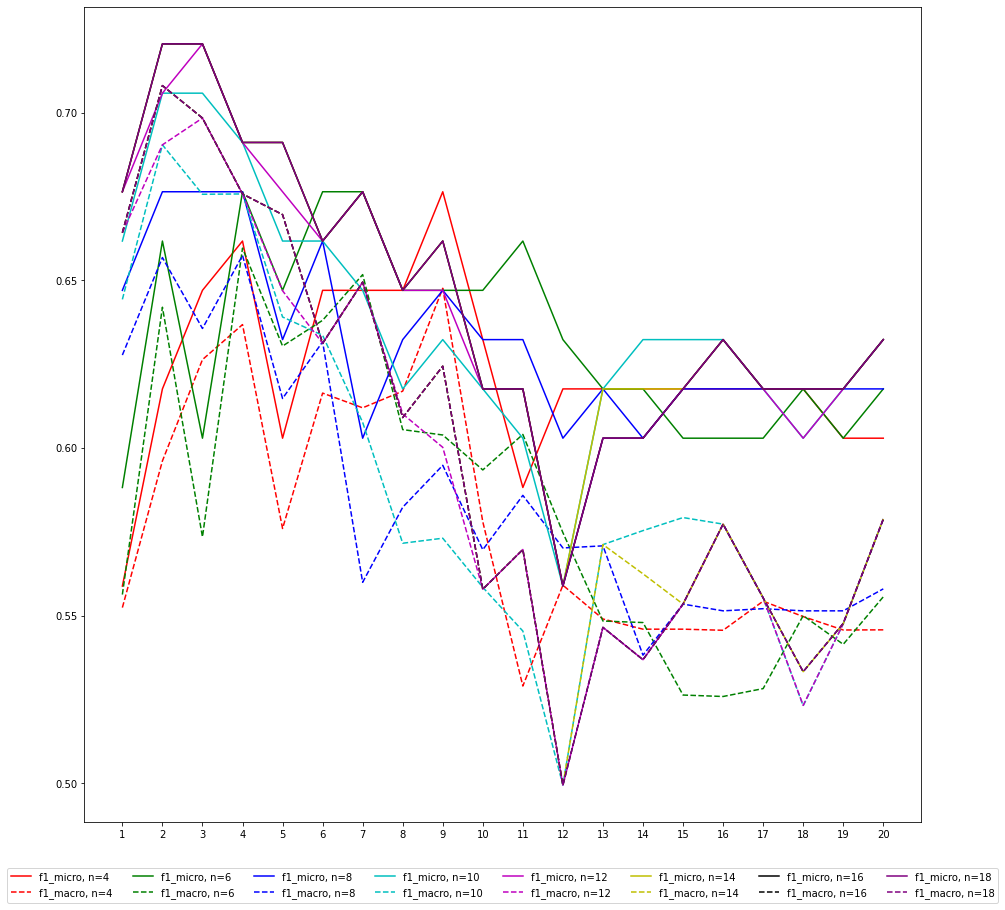

In [ ]:
from matplotlib.font_manager import FontProperties

colors=['r','g','b','c','m','y','black','purple']

fig, ax = plt.subplots(figsize=(15,15))
xax=ks
ax.set_xticks(xax)
#ax.set_ylim((0,1))

ax.set_xticklabels(xax)
for i in range(len(f1_micros)):
  ax.plot(xax, f1_micros[i],color=colors[i], label='f1_micro, n='+str(n[i]))
  ax.plot(xax, f1_macros[i],color=colors[i],linestyle="--", label='f1_macro, n='+str(n[i]))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True , ncol=8)

Παρατηρούμε πως: για n=16 και n=18 τα αποτελέσματα είναι τα ίδια. Την καλύτερη απόδοση την έχουμε για k=3 και n=16 ή 18

Xρόνος fit: 20.71
Χρόνος predict: 0.009
Bέλτιστες υπερπαράμετροι:
 {'kNN__n_neighbors': 3, 'selector__n_components': 15}


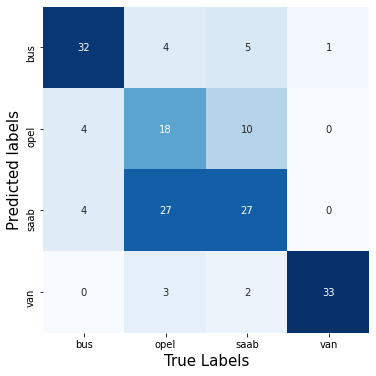

In [ ]:
k=list(range(1,21))
n_attrs=list(range(4,19))
knn = KNeighborsClassifier()
pca = PCA()
pipe = Pipeline(steps=[('selector', pca), ('kNN', knn)])

estimator1 = GridSearchCV(pipe, dict(selector__n_components=n_attrs, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
start_fit = time.time()
estimator1.fit(train_data, train_labels)
fit_time = time.time() - start_fit
start_pred = time.time()
preds = estimator1.predict(test_data)
pred_time = time.time()-start_pred

print("Xρόνος fit: "+str(fit_time)[:5]+"\nΧρόνος predict: "+str(pred_time)[:5])
print("Bέλτιστες υπερπαράμετροι:\n",estimator1.best_params_)
view_conf_matrix(test_labels, preds, unique_labels)

In [ ]:
knn_opt_preds = estimator1.best_estimator_.predict(test_data)

f1_micro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='micro')[2]
f1_macro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the CVGS:")
print("f1_micro:",f1_micro_knn_opt1 ,"f1_macro:",f1_macro_knn_opt1)

Results of the optimal knn classifier as indicated by the CVGS:
f1_micro: 0.6470588235294118 f1_macro: 0.6637844162055067


In [ ]:
estimator3 = GridSearchCV(pipe, dict(selector__n_components=[16], kNN__n_neighbors=[3]), cv=10, scoring='f1_micro', n_jobs=-1)
estimator3.fit(train_data, train_labels)
preds3 = estimator3.predict(test_data)
f1_micro_knn_opt3 = precision_recall_fscore_support(test_labels, preds3, average='micro')[2]
f1_micro_knn_opt3 = precision_recall_fscore_support(test_labels, preds3, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the graph results:")
print("f1_micro:",f1_micro_knn_opt3 ,"f1_macro:",f1_micro_knn_opt3)

Results of the optimal knn classifier as indicated by the graph results:
f1_micro: 0.6637844162055067 f1_macro: 0.6637844162055067


In [ ]:
f1_micros_opt.append(f1_micro_knn_opt1)
f1_macros_opt.append(f1_macro_knn_opt1)

**ΔΟΚΙΜΗ 3:** Standardization και βελτιστοποιηση του k

Xρόνος fit: 0.802
Χρόνος predict: 0.012
Bέλτιστες υπερπαράμετροι:
 {'kNN__n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       0.59      0.37      0.45        52
           2       0.48      0.59      0.53        44
           3       0.85      1.00      0.92        34

    accuracy                           0.70       170
   macro avg       0.71      0.74      0.71       170
weighted avg       0.69      0.70      0.68       170



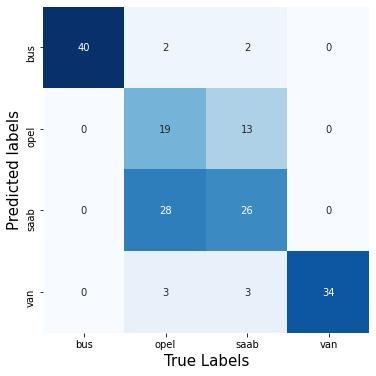

In [ ]:
from  sklearn.preprocessing import StandardScaler
k= range(10)
scaler = StandardScaler()


knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('scaler', scaler), ('kNN', knn)])

estimator1 = GridSearchCV(pipe, dict( kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator1.fit(train_data, train_labels)
preds = estimator1.predict(test_data)

print("Xρόνος fit: "+str(fit_time)[:5]+"\nΧρόνος predict: "+str(pred_time)[:5])
print("Bέλτιστες υπερπαράμετροι:\n",estimator1.best_params_)
view_conf_matrix(test_labels, preds, unique_labels)

print(classification_report(test_labels,preds1))

In [ ]:
knn_opt_preds = estimator1.best_estimator_.predict(test_data)

f1_micro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='micro')[2]
f1_macro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the CVGS:")
print("f1_micro:",f1_micro_knn_opt1 ,"f1_macro:",f1_macro_knn_opt1)

Results of the optimal knn classifier as indicated by the CVGS:
f1_micro: 0.7 f1_macro: 0.7135732671446957


In [ ]:
f1_micros_opt.append(f1_micro_knn_opt1)
f1_macros_opt.append(f1_macro_knn_opt1)

**ΔΟΚΙΜΗ 4:** Standardization, PCA και βελτιστοποιηση του k

Xρόνος fit: 0.802
Χρόνος predict: 0.012
Bέλτιστες υπερπαράμετροι:
 {'kNN__n_neighbors': 3, 'pca__n_components': 16}
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        40
           1       0.59      0.37      0.45        52
           2       0.48      0.59      0.53        44
           3       0.85      1.00      0.92        34

    accuracy                           0.70       170
   macro avg       0.71      0.74      0.71       170
weighted avg       0.69      0.70      0.68       170



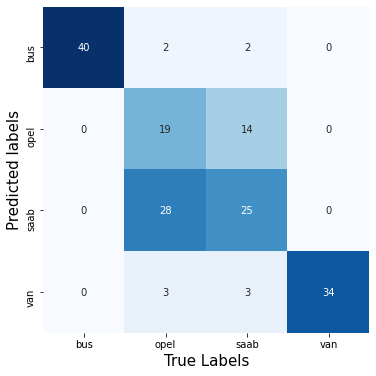

In [ ]:
from  sklearn.preprocessing import StandardScaler
k= [2,3,4]
n_components = [15,16,17]
scaler = StandardScaler()
pca = PCA()

knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('kNN', knn)])

estimator1 = GridSearchCV(pipe, dict( pca__n_components = n_components , kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
start_fit=time.time()
estimator1.fit(train_data, train_labels)
fit_time=time.time()-start_fit
start_pred=time.time()
preds = estimator1.predict(test_data)
pred_time=time.time()-start_pred

print("Xρόνος fit: "+str(fit_time)[:5]+"\nΧρόνος predict: "+str(pred_time)[:5])
print("Bέλτιστες υπερπαράμετροι:\n",estimator1.best_params_)
view_conf_matrix(test_labels, preds, unique_labels)

print(classification_report(test_labels,preds1))

In [ ]:
knn_opt_preds = estimator1.best_estimator_.predict(test_data)

f1_micro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='micro')[2]
f1_macro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the CVGS:")
print("f1_micro:",f1_micro_knn_opt1 ,"f1_macro:",f1_macro_knn_opt1)

Results of the optimal knn classifier as indicated by the CVGS:
f1_micro: 0.6941176470588235 f1_macro: 0.708455653088764


####Τελική παρουσίαση αποτελεσμάτων και παρατηρήσεις

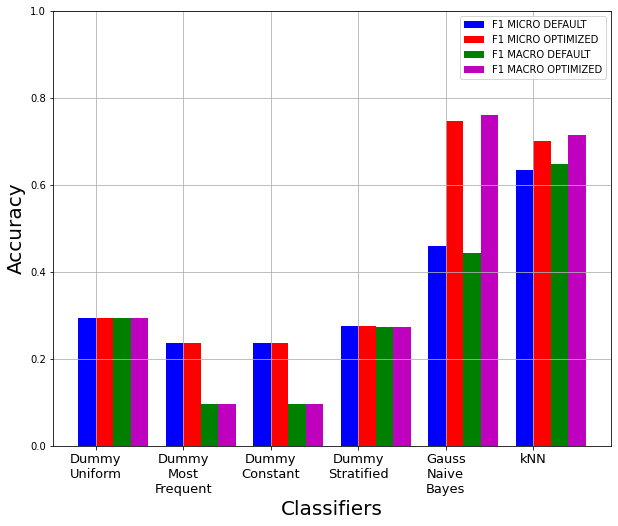

In [ ]:
#DEN EXEI TELEIWSEI AUTO AKOMA
classifiers=["Dummy\nUniform","Dummy\nMost\nFrequent","Dummy\nConstant","Dummy\nStratified","Gauss\nNaive\nBayes","kNN"]


fig, ax = plt.subplots(figsize = (10,8))
ax.grid(True)
xax=np.arange(len(classifiers))
ax.set_xticks(xax)
ax.set_xticklabels(classifiers, size=13)
ax.set_xlabel('Classifiers', size=20)
ax.set_ylim(0,1)
ax.set_ylabel("Accuracy", size=20)

ax.bar(xax-0.2, f1_micros_def, label='F1 MICRO DEFAULT',align='edge',width=0.2, color='blue' )
ax.bar(xax,f1_micros_opt, label='F1 MICRO OPTIMIZED',align='edge',width=0.2, color='red' )
ax.bar(xax + 0.2, f1_macros_def, label='F1 MACRO DEFAULT',align='edge',width=0.2, color='green' )
ax.bar(xax +0.4, f1_macros_opt, label='F1 MACRO OPTIMIZED',align='edge',width=0.2, color='m' )
plt.legend()


Αρχικά, όπως βλέπουμε, η προεπεξεργασία βελτιώνει σημαντικά τις επιδόσεις στους GNB και kNN όπου έχει σημασία. Ειδικά για τον GNB, παρατηρούμε πολύ σημαντική αύξηση της απόδοσης μόνο από την προεπεξεργασία. Οι dummies δε βελτιώνονται, καθώς είναι dummies. 

In [ ]:
f1_micro_improvements=[]
f1_macro_improvements=[]

for i in range(len(f1_micros_def)):
  f1_micro_improvements.append(100*(f1_micros_opt[i]-f1_micros_def[i])/f1_micros_def[i] )
  f1_macro_improvements.append(100*(f1_macros_opt[i]-f1_macros_def[i])/f1_macros_def[i] )

Percentage of improvement after optimization for each classifier
[Dummy Uniform, Dummy MostFrequent, Dummy Constant, Dummy Stratified, GNB , kNN]
f1_micro: [0.0, 0.0, 0.0, 0.0, 62.82051282051281, 10.185185185185185]
f1_macro: [0.0, 0.0, 0.0, 0.0, 71.379908662719, 9.939049437839639]


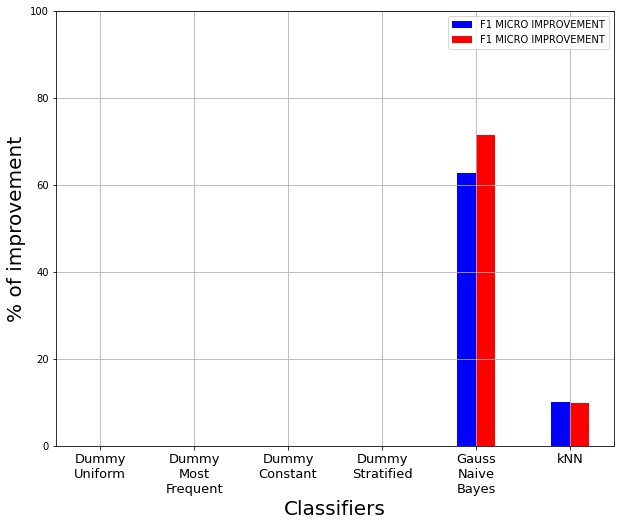

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.grid(True)
xax=np.arange(len(classifiers))
ax.set_xticks(xax)
ax.set_xticklabels(classifiers, size=13)
ax.set_xlabel('Classifiers', size=20)
ax.set_ylim(0,100)
ax.set_ylabel("% of improvement", size=20)

ax.bar(xax-0.2, f1_micro_improvements, label='F1 MICRO IMPROVEMENT',align='edge',width=0.2, color='blue' )
ax.bar(xax,f1_macro_improvements, label='F1 MICRO IMPROVEMENT',align='edge',width=0.2, color='red' )
plt.legend()

print("Percentage of improvement after optimization for each classifier")
print("[Dummy Uniform, Dummy MostFrequent, Dummy Constant, Dummy Stratified, GNB , kNN]")
print("f1_micro:",f1_micro_improvements)
print("f1_macro:",f1_macro_improvements)

In [ ]:
#@title  Table code
  
  %%html
  
  <html>
    <head>
       
    <meta charset="utf-8">
      
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.5.3/dist/css/bootstrap.min.css" integrity="sha384-TX8t27EcRE3e/ihU7zmQxVncDAy5uIKz4rEkgIXeMed4M0jlfIDPvg6uqKI2xXr2" crossorigin="anonymous">

    <title>Hello, world!</title>

    <style>

      body {

        background-color: #343A40;

      }

    </style>
   
    </head>
      <body>
      
  
  <table class="table table-dark" align="center" style="width: 800px ; border: 3px solid grey; margin-top: 20px;">
  <thead class="thead-dark">
    <tr>
      <th scope="col">#</th>
      <th scope="col">First</th>
      <th scope="col">Last</th>
      <th scope="col">Handle</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th scope="row">1</th>
      <td>f1_micros_opt[0]</td>
      <td>Μπλέτσας</td>
      <td>Μάγκας</td>
    </tr>
    <tr>
      <th scope="row">2</th>
      <td>Μάριος</td>
      <td>Παππάς</td>
      <td>Βλάκας</td>
    </tr>
    <tr>
      <th scope="row">3</th>
      <td>Ιωάννης</td>
      <td>Παλιάκης</td>
      <td>Πανευρωπανίβλακας</td>
    </tr>
  </tbody>
</table>



 <script src="https://code.jquery.com/jquery-3.5.1.slim.min.js" integrity="sha384-DfXdz2htPH0lsSSs5nCTpuj/zy4C+OGpamoFVy38MVBnE+IbbVYUew+OrCXaRkfj" crossorigin="anonymous"></script>
      
      
    <script src="https://cdn.jsdelivr.net/npm/bootstrap@4.5.3/dist/js/bootstrap.bundle.min.js" integrity="sha384-ho+j7jyWK8fNQe+A12Hb8AhRq26LrZ/JpcUGGOn+Y7RsweNrtN/tE3MoK7ZeZDyx" crossorigin="anonymous"></script>


      </body>
      </html>

#,First,Last,Handle
1,f1_micros_opt[0],Μπλέτσας,Μάγκας
2,Μάριος,Παππάς,Βλάκας
3,Ιωάννης,Παλιάκης,Πανευρωπανίβλακας


#**Μεγάλο Dataset (B09 - [SECOM Data Set](http://archive.ics.uci.edu/ml/datasets/SECOM))**

##Βασικές Πληροφορίες

1. Το dataset αφορά δεδομένα που συλλέχθηκαν κατά την παραγωγή ημιαγωγών. Yπάρχουν 1567 δείγματα με 590 χαρακτηριστικά το καθένα. Κάθε δείγμα αντιπροσωπεύει μία μονάδα που παράχθηκε και κάθε χαρακτηριστικό αντιπροσωπεύει μία μέτρηση που έγινε κατά την παραγωγή του. Όσον αφορά τα labels, οι τιμές που παίρνουν είναι 1 και -1. Η τιμή -1 υποδεικνύει πως το προϊόν πέρασε τον έλεγχο, ενώ η τιμή 1 πως απέτυχε

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/'
big_data_path = path+'big_data.data'
big_data_labels = path+'big_labels.data'

#Aνάγνωση των χαρακτηριστικών
df_data = pd.read_csv(big_data_path, sep=' ', header=None)

#Ανάγνωση των labels και εισαγωγή τους στο dataset των χαρακτηριστικών στο τελευταίο column
df_vals = pd.read_csv(big_data_labels,sep=' ', header=None)
df_vals = df_vals[0]
df_data['Label'] = df_vals
df_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,-0.0057,0.9579,203.9867,0.0,11.7692,419.3404,10.2397,0.9693,193.7470,12.5373,1.4072,-5418.75,2608.00,-6228.25,356.00,1.2817,1.9540,7.0793,71.1444,2.2222,0.1753,3.4680,83.8405,8.7164,50.2482,64.3573,49.7518,66.2013,86.3672,120.5156,...,0.80,0.4754,8.5138,0.3141,85.1806,4.2063,1.0367,1.0972,0.3553,0.0929,32.3812,264.272,0.5671,4.98,0.0877,2.0902,0.0382,1.8844,15.4662,536.3418,2.0153,7.98,0.2363,2.6401,0.0785,1.4879,11.7256,0.0068,0.0138,0.

In [ ]:
n_samples=df_data.shape[0]
print("Number of samples:",n_samples)
n_attr=df_data.shape[1]-1
print("Number of attributes:",n_attr)

Number of samples: 1567
Number of attributes: 590


2. Έχουμε 1567 δείγματα, το καθένα με 590 χαρακτηριστικά. Τα χαρακτηριστικά αυτά αντιπροσωπεύουν διάφορες μετρήσεις (πχ από αισθητήρες), επομένως πρόκειται για αριθμητικά χαρακτηριστικά.

3. Δεν υπήρχε κάποια αρίθμηση στα αρχεία κειμένου των δεδομένων, ούτε υπήρχαν κεφαλίδες.

4. Οι ετικέτες των κλάσεων είναι οι τιμές 1 και -1 οι οποίες αντιπροσωπεύουν αντίστοιχα αποτυχία και επιτυχία (δεν καταλαβαίνω γιατί να αντιστοιχίσεις το -1 σε επιτυχία, αλλά ποιος είμαι εγώ να κρίνω...)

5. Δε χρειάστηκε να κάνουμε κάποια μετατροπή στα αρχεία κειμένου, τα χρησιμοποιήσαμε όπως τα πήραμε και στη συνέχεια παράξαμε ένα ενιαίο dataset από αυτά.

6. Υπάρχουν αρκετά δείγματα με απουσιάζουσες τιμές. Συγκεκριμένα όπως βλέπουμε παρακάτω, είναι 538, δηλαδή περίπου το 34% των δειγμάτων.

In [ ]:
def check_missing_value(attributes):
  for a in attributes:
    if np.isnan(a):
      return True
  return False

missing_values_samples=0

for sample in df_data:
   if check_missing_value(df_data[sample]):
     missing_values_samples+=1

print("Samples with missing values: "+str(missing_values_samples),",", float("{:.3f}".format(100*missing_values_samples/n_samples)),"% of the total dataset")

Samples with missing values: 538 , 34.333 % of the total dataset


Ελέγχουμε για απουσιάζουσες τιμές.<br>
Παρατηρούμε ότι τα χαρακτηριστικά που έχουν πάνω από 40% των δειγμάτων απουσιάζουσες τιμές είναι 32 στο πλήθος, τα οποία και δεν κρατάμε στο dataframe.<br>
Δεν υπάρχουν δείγματα που έχουν πάνω από το 40% των χαρακτηριστικών τους απουσιάζουσες τιμές, οπότε τα κρατάμε όλα. 

In [ ]:
df_data.dropna(axis=0,thresh=354) # κρατάμε μόνο τα δείγματα με αριθμητικές τιμές τουλάχιστον στο 60% των χαρακτηριστικών τους

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,-0.0057,0.9579,203.9867,0.0,11.7692,419.3404,10.2397,0.9693,193.7470,12.5373,1.4072,-5418.75,2608.00,-6228.25,356.00,1.2817,1.9540,7.0793,71.1444,2.2222,0.1753,3.4680,83.8405,8.7164,50.2482,64.3573,49.7518,66.2013,86.3672,120.5156,...,0.80,0.4754,8.5138,0.3141,85.1806,4.2063,1.0367,1.0972,0.3553,0.0929,32.3812,264.272,0.5671,4.98,0.0877,2.0902,0.0382,1.8844,15.4662,536.3418,2.0153,7.98,0.2363,2.6401,0.0785,1.4879,11.7256,0.0068,0.0138,0.

In [ ]:
df_data.dropna(axis=1,thresh=940) #κρατάμε μόνο τα χαρακτηριστικά με αριθμητικές τιμές τουλάχιστον στο 60% των δειγμάτων

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,411.136,74.654,0.1832,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,372.822,72.442,1.8804,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,399.914,79.156,1.0388,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,-0.0057,0.9579,203.9867,0.0,11.7692,419.3404,10.2397,0.9693,193.7470,12.5373,1.4072,-5418.75,2608.00,-6228.25,356.00,1.2817,1.9540,7.0793,71.1444,2.2222,0.1753,3.4680,83.8405,8.7164,50.2482,64.3573,49.7518,66.2013,86.3672,120.5156,...,401.774,77.166,1.1040,16.90,0.80,0.4754,8.5138,0.3141,85.1806,4.2063,1.0367,1.0972,0.3553,0.0929,32.3812,264.272,0.5671,4.98,0.0877,2.0902,0.0382,1.8844,15.4662,536.3418,2.0153,7.98,0.2

7. Όπως βλέπουμε, τα δείγματά μας αντιστοιχούν σε 1463 επιτυχίες και 104 αποτυχίες. Προφανώς το dataset μας δεν είναι ισορροπημένο, καθώς η μία κλάση είναι σχεδόν 14 φορές υπερπληθέστερη από την άλλη.

In [ ]:
from collections import Counter

labels_df = df_data.iloc[:,[-1]] #Τα labels βρισκονται στην τελευταία στήλη
features_df = df_data.iloc[:,:591] #590 attributes, στις στήλες 0-590.

np_features=features_df.values #Μετατρέπουμε το dataframe σε np array
np_labels = labels_df.values.flatten()

instances_per_class = Counter(np_labels)
print(instances_per_class)

Counter({-1: 1463, 1: 104})


8. Διαχωρίζουμε το πλήθος των δεδομένων σε train και test (30% για test set)

CUT BEFORE SPLIT!!

In [ ]:
from sklearn.model_selection import train_test_split

# Split our data
train_data, test_data, train_labels, test_labels = train_test_split(np_features, np_labels, test_size=0.3)
instances_per_class = Counter(train_labels)
print(instances_per_class)

Counter({-1: 1023, 1: 73})


Για τα χαρακτηριστικά που έχουν απομείνει και έχουν NaN τιμές, επιλέγουμε να τις αντικαταστήσουμε με τις μέσες τιμές που έχουν υπολογιστεί στο train set

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
train_data = pd.DataFrame(data=train_data)
test_data = pd.DataFrame(data=test_data)

train_data.replace('nan',np.NaN,inplace=True)
test_data.replace('nan',np.NaN,inplace=True)
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')

imputed_train_data=pd.DataFrame(imp.fit_transform(train_data))
imputed_train_data.columns=train_data.columns
imputed_train_data.index=train_data.index

imputed_test_data=pd.DataFrame(imp.transform(test_data.values))
imputed_test_data.columns=test_data.columns
imputed_test_data.index=test_data.index

imputed_test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590
0,3032.45,2455.32,2172.400000,1148.410100,1.261400,100.0,102.452200,0.1227,1.4266,-0.0146,-0.0023,0.9754,203.8276,0.0,12.1250,412.2903,8.5184,0.9715,195.3092,12.4871,1.4131,-6392.75,3082.00,-2818.75,1467.7500,0.9888,1.8953,5.1690,68.3333,3.0111,0.1984,4.6586,85.2601,8.5779,50.3893,64.1459,49.6107,66.1830,86.6492,119.3278,...,0.830000,0.169700,6.425100,0.327600,50.577900,3.47120,1.126700,0.9747,0.1661,0.0403,17.0450,262.823583,0.679149,6.463849,0.14608,2.614357,0.06016,2.45815,21.220057,532.5291,2.0436,6.81,0.2148,2.4342,0.0761,1.2788,10.5119,0.021311,0.016437,0.005249,97.981424,0.5007,0.0135,0.0034,2.6869,0.0111,0.0294,0.0081,264.1507,-1.0
1,3069.02,2474.37,2151.200000,1089.595100,0.886000,100.0,100.562200,0.1247,1.4192,0.0247,-0.0041,0.9805,198.9003,0.0,10.5047,445.3548,9.4530,0.9805,189.4473,12.5031,1.3919,-5246.75,2648.25,-4225.00,-2950.2500,1.2833,1.9832,7.1935,63.6889,2.5000,0.2466,3.2181,85.8220,9.0776,50.4667,64.0590,49.5333,66.9950,86.8379,118.0494,...,1.261467,0.278303,7.714437,0.515547,57.785314,4.22638,1.666315,0.9640,0.2003,0.0413,20.7785,262.823583,0.679149,6.463849,0.14608,2.614357,0.06016,2.45815,21.220057,529.3827,1.9833,8.39,0.3697,2.7962,0.1378,1.5849,18.6404,0.021311,0.016437,0.005249,97.981424,0.5038,0.0150,0.0035,2.9788,0.0048,0.0226,0.0079,474.0812,-1.0
2,3036.24,2548.46,2204.666700,1078.786000,0.915200,100.0,103.961100,0.1196,1.3062,-0.0069,-0.0089,0.9711,197.9591,0.0,9.7063,421.2666,9.9885,0.9737,187.9706,12.4343,1.3878,-5405.50,2582.00,-1450.50,-4088.5000,1.2862,1.9750,7.2083,73.2444,2.2444,0.1768,3.2762,85.9625,8.7552,50.1251,64.1204,49.8749,66.2133,86.4380,120.4374,...,1.240000,0.144200,8.819500,0.512400,59.501100,4.71400,1.648500,0.9691,0.2712,0.0559,27.9814,271.466000,0.558300,5.570000,0.22290,2.654100,0.08790,2.05180,39.928300,534.3264,1.5887,5.40,0.2039,1.8036,0.0540,1.0106,12.8330,-0.016900,0.014800,0.005200,87.862700,0.5030,0.0229,0.0047,4.5482,-0.0169,0.0148,0.0052,87.8627,-1.0
3,2927.54,2563.08,2188.711100,1115.492200,1.515600,100.0,102.001100,0.1225,1.4854,-0.0006,0.0089,0.9641,198.4925,0.0,4.7315,410.1946,9.6217,0.9776,188.8708,12.5012,1.3962,-5585.25,2634.25,-7445.50,-1231.7500,1.2822,2.0025,7.3483,74.5778,2.0556,0.1791,3.4238,84.8949,8.3588,50.3833,64.4228,49.6168,66.2366,86.5828,120.3726,...,0.780000,0.089200,5.012600,0.319200,38.632000,2.67910,1.052200,0.9326,0.1028,0.0229,11.0253,247.666000,0.691000,6.210000,0.10210,2.233100,0.03860,2.50740,14.775200,534.1245,2.1586,9.97,0.1638,3.5140,0.0470,1.8666,7.5875,0.021311,0.016437,0.005249,97.981424,0.5004,0.0135,0.0032,2.6936,0.0275,0.0215,0.0076,78.1199,-1.0
4,3037.63,2524.13,2194.955500,1108.224600,1.247600,100.0,102.282200,0.1202,1.3969,-0.0074,-0.0152,0.9813,198.3979,0.0,8.2379,417.0552,9.7887,0.9794,188.6092,12.5967,1.3992,-5459.75,2712.00,-3206.00,-4729.3333,1.2808,2.0095,7.2988,70.8667,2.1667,0.1621,3.4173,86.7559,8.7597,50.7503,64.1627,49.2497,65.9682,87.0029,115.9620,...,1.000000,0.065800,7.161400,0.376700,21.344000,3.97900,1.360500,0.9876,0.4895,0.0745,49.5678,262.823583,0.679149,6.463849,0.14608,2.614357,0.06016,2.45815,21.220057,533.9936,2.2318,8.27,0.3001,2.7629,0.0861,1.5487,13.4487,0.028400,0.020900,0.005800,73.512000,0.5033,0.0268,0.0059,5.3287,0.0284,0.0209,0.0058,73.5120,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,2941.71,2529.42,2196.688900,1593.122000,1.592500,100.0,99.113300,0.1226,1.4291,-0.0048,-0.0185,0.9475,199.9388,0.0,8.6533,417.0018,10.1811,0.9567,189.7577,12

##Ταξινόμηση
Οι ταξινομητές που εξετάζουμε σε αυτό το dataset είναι οι: dummy, Gaussian Naive Bayes, kNN.

###Baseline Classification

In [ ]:
unique_labels = ["Pass" ,"Fail"]

####Dummy Classifiers
Θα χρησιμοποιήσυμε όλες τις γνωστές στρατηγικές επιλογής για τους dummy classifiers 

IMPUTED!!!!

Dummy Uniform Classifier

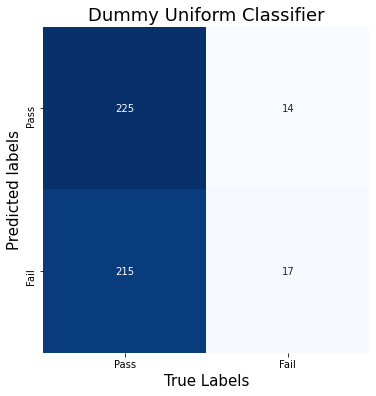

In [ ]:
dummy_uniform = DummyClassifier(strategy='uniform')
dummy_uniform_model = dummy_uniform.fit(train_data, train_labels)
dummy_uniform_preds = dummy_uniform.predict(test_data)
view_conf_matrix(test_labels, dummy_uniform_preds, unique_labels,title="Dummy Uniform Classifier" )

In [ ]:
f1_micro_du = precision_recall_fscore_support(test_labels, dummy_uniform_preds, average='micro')[2]
f1_macro_du = precision_recall_fscore_support(test_labels, dummy_uniform_preds, average='macro')[2]

print("Dummy Uniform Classifier:\t f1_micro:"+str(f1_micro_du)[:5]+"\t f1_macro:"+str(f1_macro_du)[:5]+'\n')

print(classification_report(test_labels, dummy_uniform_preds , target_names=unique_labels))

Dummy Uniform Classifier:	 f1_micro:0.513	 f1_macro:0.396

              precision    recall  f1-score   support

        Pass       0.94      0.51      0.66       440
        Fail       0.07      0.55      0.13        31

    accuracy                           0.51       471
   macro avg       0.51      0.53      0.40       471
weighted avg       0.88      0.51      0.63       471



Dummy Most Frequent Classifier

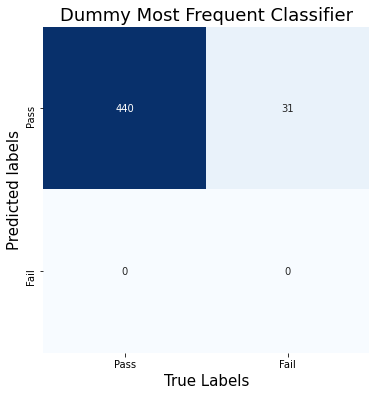

In [ ]:
dummy_mostFrequent = DummyClassifier(strategy='most_frequent')

dummy_mostFrequent_model = dummy_mostFrequent.fit(train_data, train_labels)
dummy_mostFrequent_preds = dummy_mostFrequent.predict(test_data)

view_conf_matrix(test_labels, dummy_mostFrequent_preds, unique_labels,title="Dummy Most Frequent Classifier" )

In [ ]:
f1_micro_dmf = precision_recall_fscore_support(test_labels, dummy_mostFrequent_preds, average='micro')[2]
f1_macro_dmf = precision_recall_fscore_support(test_labels, dummy_mostFrequent_preds, average='macro')[2]

print("Dummy Most Frequent Classifier:\t f1_micro:"+str(f1_micro_dmf)[:5]+"\t f1_macro:"+str(f1_macro_dmf)[:5]+'\n')

print(classification_report(test_labels, dummy_mostFrequent_preds , target_names=unique_labels))

Dummy Most Frequent Classifier:	 f1_micro:0.934	 f1_macro:0.482

              precision    recall  f1-score   support

        Pass       0.93      1.00      0.97       440
        Fail       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Constant Classifier
Επιλέγουμε ο constant classifier να ταξινομεί όλα τα δείγματα στην πιο πολυπληθή κλάση σε όλο το σύνολο (train και test), η οποία είναι η -1 (Pass)

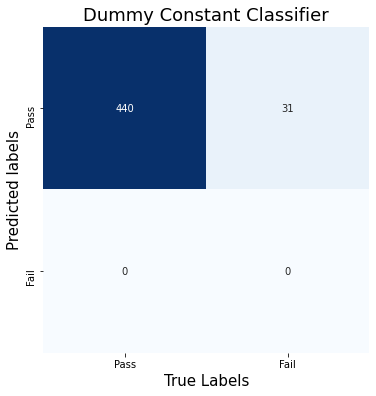

In [ ]:
dummy_const = DummyClassifier(strategy='constant',constant=-1 )

dummy_const_model = dummy_const.fit(train_data, train_labels)
dummy_const_preds = dummy_const.predict(test_data)

view_conf_matrix(test_labels, dummy_const_preds, unique_labels,title="Dummy Constant Classifier" )

In [ ]:
f1_micro_dc = precision_recall_fscore_support(test_labels, dummy_const_preds, average='micro')[2]
f1_macro_dc = precision_recall_fscore_support(test_labels, dummy_const_preds, average='macro')[2]

print("Dummy Most Frequent Classifier:\t f1_micro:"+str(f1_micro_dc)[:5]+"\t f1_macro:"+str(f1_macro_dc)[:5]+'\n')

print(classification_report(test_labels, dummy_const_preds , target_names=unique_labels))

Dummy Most Frequent Classifier:	 f1_micro:0.934	 f1_macro:0.482

              precision    recall  f1-score   support

        Pass       0.93      1.00      0.97       440
        Fail       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dummy Stratified

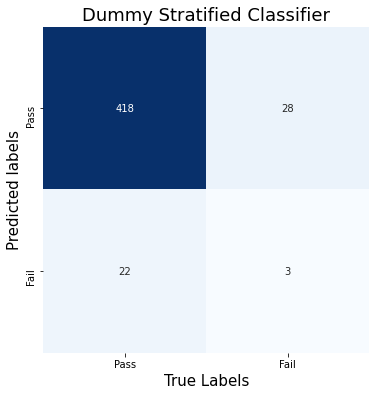

In [ ]:
dummy_stratified = DummyClassifier(strategy='stratified')

dummy_stratified_model = dummy_stratified.fit(train_data, train_labels)
dummy_stratified_preds = dummy_stratified.predict(test_data)

view_conf_matrix(test_labels, dummy_stratified_preds, unique_labels,title="Dummy Stratified Classifier" )

In [ ]:
f1_micro_ds = precision_recall_fscore_support(test_labels, dummy_stratified_preds, average='micro')[2]
f1_macro_ds = precision_recall_fscore_support(test_labels, dummy_stratified_preds, average='macro')[2]

print("Dummy Stratified Classifier:\t f1_micro:"+str(f1_micro_ds)[:5]+"\t f1_macro:"+str(f1_macro_ds)[:5]+'\n')

print(classification_report(test_labels, dummy_stratified_preds , target_names=unique_labels))

Dummy Stratified Classifier:	 f1_micro:0.893	 f1_macro:0.525

              precision    recall  f1-score   support

        Pass       0.94      0.95      0.94       440
        Fail       0.12      0.10      0.11        31

    accuracy                           0.89       471
   macro avg       0.53      0.52      0.53       471
weighted avg       0.88      0.89      0.89       471



#### Gaussian Naive Bayes Classifier

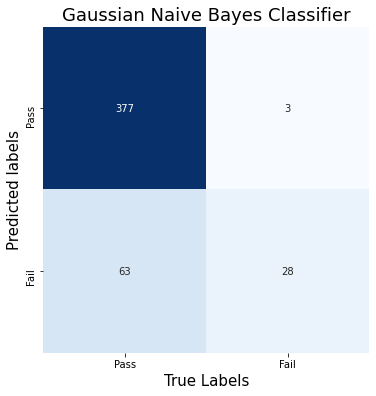

In [ ]:
gnb = GaussianNB()

gnb_model = gnb.fit(imputed_train_data, train_labels)
gnb_preds = gnb.predict(imputed_test_data)

view_conf_matrix(test_labels, gnb_preds, unique_labels,title="Gaussian Naive Bayes Classifier" )

In [ ]:
f1_micro_gnb = precision_recall_fscore_support(test_labels, gnb_preds, average='micro')[2]
f1_macro_gnb = precision_recall_fscore_support(test_labels, gnb_preds, average='macro')[2]

print("Gaussian Naive Bayes Classifier:\t f1_micro:"+str(f1_micro_gnb)[:5]+"\t f1_macro:"+str(f1_macro_gnb)[:5]+'\n')

print(classification_report(test_labels, gnb_preds , target_names=unique_labels))

Gaussian Naive Bayes Classifier:	 f1_micro:0.859	 f1_macro:0.689

              precision    recall  f1-score   support

        Pass       0.99      0.86      0.92       440
        Fail       0.31      0.90      0.46        31

    accuracy                           0.86       471
   macro avg       0.65      0.88      0.69       471
weighted avg       0.95      0.86      0.89       471



#### kNN Classifier

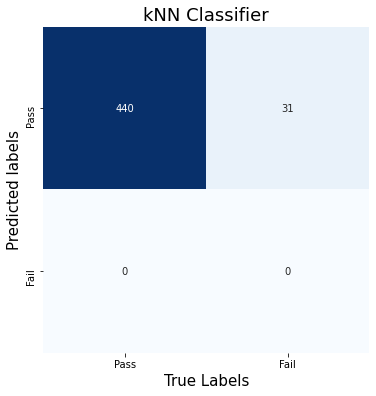

In [ ]:
knn = KNeighborsClassifier()  #Η default τιμη του k είναι 5. Θα βελτιστοποιηθεί σε επόμενο βήμα
knn_model = knn.fit(imputed_train_data, train_labels)
knn_preds = knn.predict(imputed_test_data)

view_conf_matrix(test_labels, knn_preds, unique_labels,title="kNN Classifier" )

In [ ]:
f1_micro_knn = precision_recall_fscore_support(test_labels, knn_preds, average='micro')[2]
f1_macro_knn = precision_recall_fscore_support(test_labels, knn_preds, average='macro')[2]

print("kΝΝ Classifier:\t f1_micro:"+str(f1_micro_knn)[:5]+"\t f1_macro:"+str(f1_macro_knn)[:5]+'\n')

print(classification_report(test_labels, knn_preds , target_names=unique_labels))

kΝΝ Classifier:	 f1_micro:0.934	 f1_macro:0.482

              precision    recall  f1-score   support

        Pass       0.93      1.00      0.97       440
        Fail       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Σύγκριση και σχολιασμός Αποτελεσμάτων

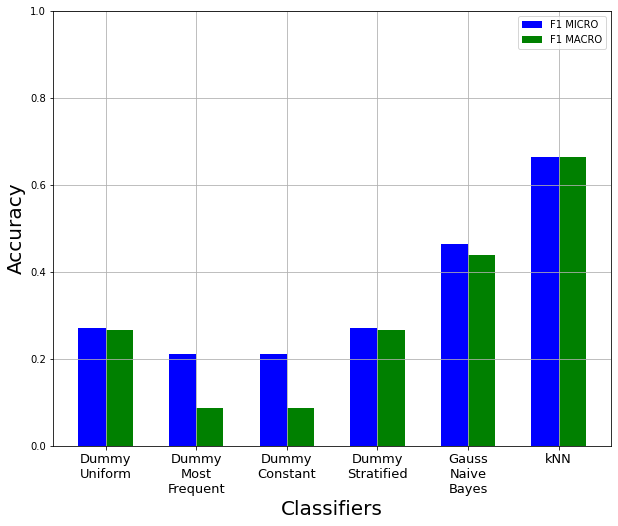

In [ ]:
classifiers=["Dummy\nUniform","Dummy\nMost\nFrequent","Dummy\nConstant","Dummy\nStratified","Gauss\nNaive\nBayes","kNN"]

f1_micros_def=[f1_micro_du, f1_micro_dmf, f1_micro_dc, f1_micro_ds, f1_micro_gnb, f1_micro_knn]
f1_macros_def=[f1_macro_du, f1_macro_dmf, f1_macro_dc, f1_macro_ds, f1_macro_gnb, f1_macro_knn]

fig, ax = plt.subplots(figsize = (10,8))
ax.grid(True)
xax=np.arange(len(classifiers))
ax.set_xticks(xax)
ax.set_xticklabels(classifiers, size=13)
ax.set_xlabel('Classifiers', size=20)
ax.set_ylim(0,1)
ax.set_ylabel("Accuracy", size=20)

ax.bar(xax-0.3,f1_micros_def, label='F1 MICRO',align='edge',width=0.3, color='blue' )
ax.bar(xax, f1_macros_def, label='F1 MACRO',align='edge',width=0.3, color='green' )
plt.legend()


Όπως εύκολα παρατηρούμε, ο kNN έχει πολύ καλύτερες επιδόσεις από όλους τους ταξινομητές.

### Βελτιστοποίηση Ταξινομητών

#### Βελτιστοποίηση Dummy Classifiers

Just kidding, δε μπορεί να γίνει κάποια βελτιστοποίηση και δε θα αναλωθουμε προσπαθωντας να βελτιώσουμε τους dummies. Το όνομά τους δεν το πήραν τυχαια :)

In [ ]:
f1_micros_opt=[f1_micro_du, f1_micro_dmf, f1_micro_dc, f1_micro_ds]
f1_macros_opt=[f1_macro_du, f1_macro_dmf, f1_macro_dc, f1_macro_ds]

#### Βελτιστοποίηση Gaussian Naive Bayes Classifier  
Ο GNB Classifier δεν έχει κάποια υπερπαράμετρο προς βελτιστοποίηση, οπότε προσπαθούμε να πάρουμε καλύτερα αποτελέσματα αποκλειστικά μέσω του preprocessing

#####**ΔΟΚΙΜΗ 1: Μείωση της διαστατικότητας των δεδομένων με επιλογή χαρακτηριστικών έπειτα απο min-max κανονικοποίηση:**  
Η πρώτη δοκιμή που κάναμε ήταν να εφαρμόσουμε κανονικοποίηση min-max στα δεδομένα και στη συνέχεια να κάνουμε επιλογή χαρακτηριστικών χρησιμοποιώντασ Variance Threshold. Η υψηλότερη απόδοση που καταφέραμε να πάρουμε ήταν της τάξης του 52%, συνεπώς δεν υπήρξε κάποια βελτίωση.






Threshold=0. Keeping 18 attributes.
Threshold=0.01. Keeping 16 attributes.
Threshold=0.02. Keeping 15 attributes.
Threshold=0.03. Keeping 13 attributes.
Threshold=0.05. Keeping 2 attributes.
Threshold=0.06. Keeping 1 attributes.


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


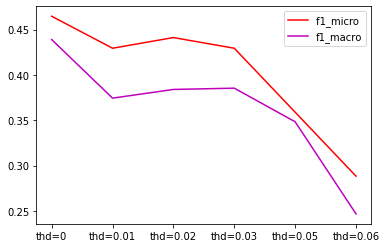

In [ ]:
#ΔΟΚΙΜΗ ΜΕΙΩΣΗΣ ΔΙΑΣΤΑΣΕΩΝ ΜΕ ΕΠΙΛΟΓΗ ΜΕΤΑΒΛΗΤΩΝ EΠΕΙΤΑ ΑΠΟ ΚΑΝΟΝΙΚΟΠΟΙΗΣΗ (Δεν πηγε και πολυ καλα αυτο)

min_max_scaler = preprocessing.MinMaxScaler()
train_data_norm = min_max_scaler.fit_transform(train_data)
test_data_norm = min_max_scaler.transform(test_data)

f1_micros=[]
f1_macros=[]
thds = [0,0.01,0.02,0.03,0.05,0.06]
for threshold in thds:
  selector = VarianceThreshold(threshold=threshold)
  train_data_reduced = selector.fit_transform(train_data_norm)
  mask = selector.get_support()
  print("Threshold="+str(threshold)+". Keeping "+str(list(mask).count(True))+" attributes.")
  train_data_reduced = train_data_norm[:,mask]
  test_data_reduced = test_data_norm[:,mask]
  gnb_model_opt = gnb.fit(train_data_reduced, train_labels)
  gnb_preds_opt = gnb.predict(test_data_reduced)
  f1_micros.append(precision_recall_fscore_support(test_labels, gnb_preds_opt, average='micro')[2])
  f1_macros.append(precision_recall_fscore_support(test_labels, gnb_preds_opt, average='macro')[2])


fig, ax = plt.subplots()
xax=range(len(thds))
ax.set_xticks(xax)
ax.set_xticklabels(["thd="+str(i) for i in thds])
ax.plot(xax, f1_micros, label='f1_micro ', color='red')
ax.plot(xax, f1_macros, label='f1_macrο', color='m')
plt.legend()

#####**ΔΟΚΙΜΗ 2: Μείωση της διαστατικότητας των δεδομένων με την τεχνική PCA**  
Eδώ αυτό που καταφέραμε είναι αρκετά παράξενο. Ενώ η τεχνική PCA αποσκοπεί στη μείωση της διαστατικότητας, εν τέλει, τα καλύτερα αποτελέσματα τα πήραμε όταν εφαρμόσαμε μετασχηματισμό που οδηγούσε σε ίδιο αριθμό διαστάσεων με τον αρχικό. Αυτό που ενδεχομένως έγινε, είναι ότι η μέθοδος παρήγαγε διαφορετικά 18 χαρακτηριστικά από τα αρχικά 18 που είχαν τα δείγματα. Η βελτίωση είναι σημαντική, καθώς από accuracy της ταξης του 50%, πήγαμε σε τάξη του 70%.

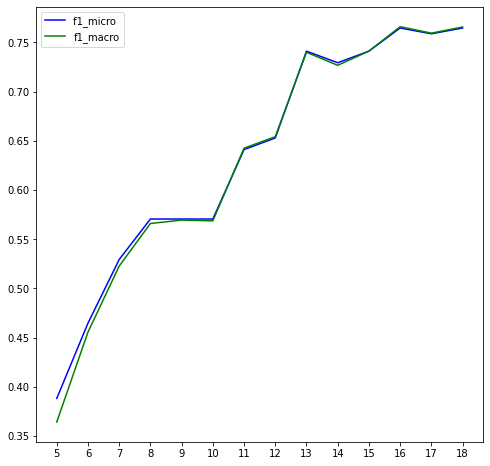

In [ ]:
#ΔΟΚΙΜΗ ΜΕΙΩΣΗΣ ΔΙΑΣΤΑΣΕΩΝ ΜΕ ΕΞΑΓΩΓΗ ΧΑΡΑΚΤΗΡΙΣΤΙΚΩΝ
f1_micros=[]
f1_macros=[]
nus = list(range(5,19))

for n in nus:
  pca = PCA(n_components=n)
  train_data_reduced = pca.fit_transform(train_data)
  test_data_reduced = pca.transform(test_data)
  gnb_model_opt = gnb.fit(train_data_reduced, train_labels)
  gnb_preds_opt = gnb.predict(test_data_reduced)
  f1_micros.append(precision_recall_fscore_support(test_labels, gnb_preds_opt, average='micro')[2])
  f1_macros.append(precision_recall_fscore_support(test_labels, gnb_preds_opt, average='macro')[2])

fig, ax = plt.subplots(figsize=(8,8))
xax=range(len(nus))
ax.set_xticks(xax)
ax.set_xticklabels(nus)
ax.plot(xax, f1_micros, label='f1_micro ', color='b')
ax.plot(xax, f1_macros, label='f1_macro', color='g')
plt.legend()

In [ ]:
f1_micros_opt.append(f1_micros[-1])
f1_macros_opt.append(f1_macros[-1])

In [ ]:
f1_macros_opt

[0.2673913969414475,
 0.08737864077669903,
 0.08737864077669903,
 0.26613605549087366,
 0.7657246810207337]

In [ ]:
f1_micros_opt


[0.27058823529411763,
 0.21176470588235294,
 0.21176470588235294,
 0.27058823529411763,
 0.7647058823529412]

#### kNN Classifier
Εδώ, εκτός από τους διάφορους μετασχηματισμούς κατά την προεπεξεργασία των δεδομένων, θα βελτιστοποιήσουμε και την παράμετρο k του kNN χρησιμοποιώντας 10-fold cross validation. **NA TΡΕΧΤΕΙ 1 ΦΟΡΑ ΠΡΙΝ ΤΗΝ ΥΠΟΒΟΛΗ ΚΑΙ ΝΑ ΓΙΝΟΥΝ EDIT ΤΑ ΣΧΟΛΙΑ**

#####**ΔΟΚΙΜΗ 1: Εφαρμογή κανονικοποίησης min-max και στη συνεχεια επιλογή χαρακτηριστικών με VarianceThreshold:**  
Κανονικοποιούμε το dataset με τη μέθοδο min-max και στη συνέχεια δοκιμάζουμε τους εξής συνδυασμούς:  
- $k \in(1,20)$ 
- $thd \in (0,0.06)$ με βήμα $0.01$

Πρώτα κάναμε τη διαδικασία χειροκίνητα και παρουσιάζουμε γραφικά τα αποτελέσματα και στη συνέχεια επαναλαμβάνουμε τη διαδικασία κάνοντας pipeline και CVGridSearch.

In [ ]:
#ΔΟΚΙΜΗ ΜΕΙΩΣΗΣ ΔΙΑΣΤΑΣΕΩΝ ΜΕ ΕΠΙΛΟΓΗ ΜΕΤΑΒΛΗΤΩΝ EΠΕΙΤΑ ΑΠΟ ΚΑΝΟΝΙΚΟΠΟΙΗΣΗ

#Aρχικά κάνουμε τη διαδικασία χειροκίνητα
min_max_scaler = preprocessing.MinMaxScaler()
train_data_norm = min_max_scaler.fit_transform(train_data)
test_data_norm = min_max_scaler.transform(test_data)

f1_micros=[]
f1_macros=[]

thds = [0,0.01,0.02,0.03,0.05,0.06]
ks = list(range(1,21)) #Θα μπορούσαμε να πάρουμε μόνο τα περιττά k, αλλά έχουμε 4 κλάσεις, όχι 2 οπότε οι ισοπαλίες δε θα είναι συχνές.

for threshold in thds:
  selector = VarianceThreshold(threshold=threshold)
  train_data_reduced = selector.fit_transform(train_data_norm)
  mask = selector.get_support()
  print("Threshold="+str(threshold)+". Keeping "+str(list(mask).count(True))+" attributes.")
  train_data_reduced = train_data_norm[:,mask]
  test_data_reduced = test_data_norm[:,mask]

  thd_f1_micros=[]
  thd_f1_macros=[]

  for k in ks:
    knn_opt = KNeighborsClassifier(n_neighbors=k)
    f1_micro = cross_val_score(knn_opt, train_data_reduced, train_labels, cv=10, scoring='f1_micro')[2]
    f1_macro = cross_val_score(knn_opt, train_data_reduced, train_labels, cv=10, scoring='f1_macro')[2]
    print("\t k="+str(k)+". f1_micro="+str(f1_micro)[:6]+" f1_macro="+str(f1_macro)[:6])
    thd_f1_micros.append(f1_micro)
    thd_f1_macros.append(f1_macro)
  
  f1_micros.append(thd_f1_micros)
  f1_macros.append(thd_f1_macros)

Threshold=0. Keeping 18 attributes.
	 k=1. f1_micro=0.6911 f1_macro=0.6846
	 k=2. f1_micro=0.7352 f1_macro=0.7277
	 k=3. f1_micro=0.7058 f1_macro=0.6885
	 k=4. f1_micro=0.6764 f1_macro=0.6657
	 k=5. f1_micro=0.6617 f1_macro=0.6507
	 k=6. f1_micro=0.6323 f1_macro=0.6095
	 k=7. f1_micro=0.6470 f1_macro=0.6288
	 k=8. f1_micro=0.6764 f1_macro=0.6622
	 k=9. f1_micro=0.7058 f1_macro=0.6895
	 k=10. f1_micro=0.7058 f1_macro=0.6938
	 k=11. f1_micro=0.7205 f1_macro=0.7061
	 k=12. f1_micro=0.7352 f1_macro=0.7265
	 k=13. f1_micro=0.7352 f1_macro=0.7191
	 k=14. f1_micro=0.7352 f1_macro=0.7261
	 k=15. f1_micro=0.75 f1_macro=0.7378
	 k=16. f1_micro=0.7352 f1_macro=0.7209
	 k=17. f1_micro=0.7058 f1_macro=0.6887
	 k=18. f1_micro=0.7205 f1_macro=0.7055
	 k=19. f1_micro=0.7058 f1_macro=0.6887
	 k=20. f1_micro=0.7352 f1_macro=0.7250
Threshold=0.01. Keeping 16 attributes.
	 k=1. f1_micro=0.6911 f1_macro=0.6846
	 k=2. f1_micro=0.7058 f1_macro=0.6979
	 k=3. f1_micro=0.6911 f1_macro=0.6686
	 k=4. f1_micro=0.6

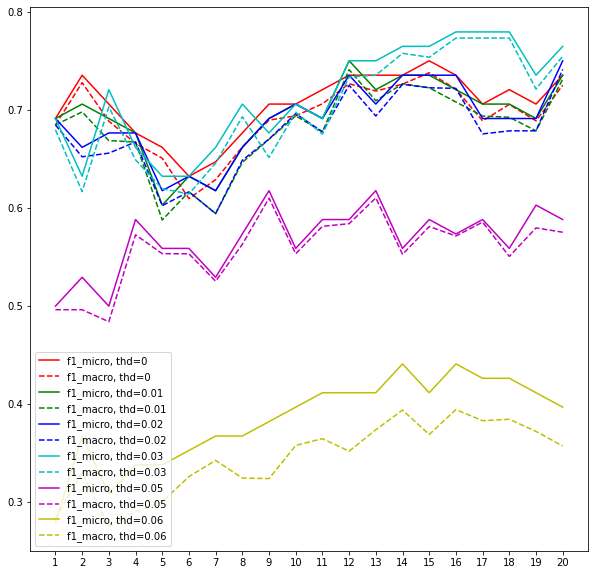

In [ ]:
colors=['r','g','b','c','m','y']
fig, ax = plt.subplots(figsize=(10,10))
xax=ks
ax.set_xticks(xax)
#ax.set_ylim(0,1)
ax.set_xticklabels(xax)
for i in range(len(f1_micros)):
  ax.plot(xax, f1_micros[i],colors[i], label='f1_micro, thd='+str(thds[i]))
  ax.plot(xax, f1_macros[i],colors[i]+"--", label='f1_macro, thd='+str(thds[i]))
plt.legend()

In [ ]:
#Στη συνέχεια κάνουμε την ίδια διαδικασία μέσω της χρήσης pipeline+GridSearchCV
#Xρησιμοποιούμε 2 ίδιους estimators με μοναδική διαφορά τη μετρκή απόδοσης.
selector=VarianceThreshold()
min_max_scaler = preprocessing.MinMaxScaler()
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('scaler', min_max_scaler),('selector', selector), ('kNN', knn)])
estimator1 = GridSearchCV(pipe, dict(selector__threshold=thds, kNN__n_neighbors=ks), cv=10, scoring='f1_micro', n_jobs=-1)
estimator2 = GridSearchCV(pipe, dict(selector__threshold=thds, kNN__n_neighbors=ks), cv=10, scoring='f1_macro', n_jobs=-1)
estimator1.fit(train_data, train_labels)
estimator2.fit(train_data, train_labels)
preds1 = estimator1.predict(test_data)
preds2 = estimator2.predict(test_data)

In [ ]:
print(estimator2.best_estimator_)
print(estimator2.best_params_)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('selector', VarianceThreshold(threshold=0)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 3, 'selector__threshold': 0}


Βλέπουμε πως το GridSearchCV προτείνει τις τιμές k=3, thd=0. Οι τιμές αυτές όπως μπορούμε να δούμε από το παραπάνω διάγραμμα δεν είναι οι βέλτιστες, αλλά είναι κοντά στις βέλτιστες. Θα ορίσουμε και έναν τρίτο estimator με τις βέλτιστες τιμές που προκύπτουν από το διάγραμμα, δηλαδή k=11, thd=0.01 και θα συγκρίνουμε τις αποδόσεις των 2 σσυνδυασμών στο test set.

In [ ]:
knn_opt_preds = estimator1.best_estimator_.predict(test_data)

f1_micro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='micro')[2]
f1_macro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the CVGS:")
print("f1_micro:",f1_micro_knn_opt1 ,"f1_macro:",f1_macro_knn_opt1)

Results of the optimal knn classifier as indicated by the CVGS:
f1_micro: 0.6470588235294118 f1_macro: 0.6419996024647187


In [ ]:
estimator3 = GridSearchCV(pipe, dict(selector__threshold=[0.01], kNN__n_neighbors=[11]), cv=10, scoring='f1_micro', n_jobs=-1)
estimator3.fit(train_data, train_labels)
preds3 = estimator3.predict(test_data)
f1_micro_knn_opt3 = precision_recall_fscore_support(test_labels, preds3, average='micro')[2]
f1_micro_knn_opt3 = precision_recall_fscore_support(test_labels, preds3, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the graph results:")
print("f1_micro:",f1_micro_knn_opt3 ,"f1_macro:",f1_micro_knn_opt3)

ValueError: ignored

Όπως βλέπουμε, το ζεύγος των υπερπαραμέτρων που πρότεινε το GSCV δεν είναι το βέλτιστο, αλλά είναι κοντά στο βέλτιστο. Δεν ισχυριζόμαστε πως το ζεύγος k=11, thd=0.01 είναι αναγκαία το βέλτιστο, αλλά φαίνεται πως είχε καλύτερα αποτελέσματα στο test set. Παρ όλα αυτά, σε κάθε περίπτωση η βελτίωση είναι ασήμαντη μιας και το αρχικό accuracy του kNN ήταν έτσι κι αλλιώς κοντά στο 60%

**ΔΟΚΙΜΗ 1.5**

In [ ]:
thds=[0, 50, 80, 100, 150, 500]
kappas = [10, 20, 30, 40, 50, 60, 70, 80]

selector=VarianceThreshold()
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('selector', selector), ('kNN', knn)])
estimator1 = GridSearchCV(pipe, dict(selector__threshold=thds, kNN__n_neighbors=kappas), cv=10, scoring='f1_micro', n_jobs=-1)
estimator2 = GridSearchCV(pipe, dict(selector__threshold=thds, kNN__n_neighbors=kappas), cv=10, scoring='f1_macro', n_jobs=-1)
estimator1.fit(train_data, train_labels)
estimator2.fit(train_data, train_labels)
preds1 = estimator1.predict(test_data)
preds2 = estimator2.predict(test_data)

print(estimator1.best_estimator_)
print(estimator1.best_params_)

Pipeline(memory=None,
         steps=[('selector', VarianceThreshold(threshold=50)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=20, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 20, 'selector__threshold': 50}


In [ ]:
kappas = [15,16,17,18,19,20,21,22,23,24,25]
thds = [45, 47, 49, 50, 51, 53, 55]

pipe = Pipeline(steps=[('selector', selector), ('kNN', knn)])
estimator1 = GridSearchCV(pipe, dict(selector__threshold=thds, kNN__n_neighbors=kappas), cv=10, scoring='f1_micro', n_jobs=-1)
estimator2 = GridSearchCV(pipe, dict(selector__threshold=thds, kNN__n_neighbors=kappas), cv=10, scoring='f1_macro', n_jobs=-1)
estimator1.fit(train_data, train_labels)
estimator2.fit(train_data, train_labels)
preds1 = estimator1.predict(test_data)
preds2 = estimator2.predict(test_data)

print(estimator1.best_estimator_)
print(estimator1.best_params_)

print(estimator2.best_estimator_)
print(estimator2.best_params_)

Pipeline(memory=None,
         steps=[('selector', VarianceThreshold(threshold=45)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=19, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 19, 'selector__threshold': 45}
Pipeline(memory=None,
         steps=[('selector', VarianceThreshold(threshold=45)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=19, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 19, 'selector__threshold': 45}


In [ ]:
knn_opt_preds = estimator1.best_estimator_.predict(test_data)

f1_micro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='micro')[2]
f1_macro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the CVGS:")
print("f1_micro:",f1_micro_knn_opt1 ,"f1_macro:",f1_macro_knn_opt1)

Results of the optimal knn classifier as indicated by the CVGS:
f1_micro: 0.5705882352941176 f1_macro: 0.5610224023974335


#####**ΔΟΚΙΜΗ 2: Μείωση της διαστατικότητας με τη μέθοδο PCA**
Εδώ δε θα κάνουμε κάποια κανονικοποίηση στις τιμές των δεδομένων και θα δούμε πώς επιδρά η PCA στην απόδοση του kNN. Δοκιμάζουμε τους εξής συνδυασμούς:    
- $k \in(1,20)$ 
- $n_{attributes} \in (4,18)$

In [ ]:
#Aρχικά κάνουμε τη διαδικασία χειροκίνητα

f1_micros=[]
f1_macros=[]

n = list(range(4,19,2))
ks = list(range(1,21)) #Θα μπορούσαμε να πάρουμε μόνο τα περιττά k, αλλά έχουμε 4 κλάσεις, όχι 2 οπότε οι ισοπαλίες δε θα είναι συχνές.

for nu in n:
  pca = PCA(n_components=nu)
  train_data_pca = pca.fit_transform(train_data)
  print("n="+str(nu)+". "+str(nu)+" attributes.")

  nu_f1_micros=[]
  nu_f1_macros=[]

  for k in ks:
    knn_opt = KNeighborsClassifier(n_neighbors=k)
    f1_micro = cross_val_score(knn_opt, train_data_pca, train_labels, cv=10, scoring='f1_micro')[2]
    f1_macro = cross_val_score(knn_opt, train_data_pca, train_labels, cv=10, scoring='f1_macro')[2]
    print("\t k="+str(k)+". f1_micro="+str(f1_micro)[:6]+" f1_macro="+str(f1_macro)[:6])
    nu_f1_micros.append(f1_micro)
    nu_f1_macros.append(f1_macro)
  
  f1_micros.append(nu_f1_micros)
  f1_macros.append(nu_f1_macros)

n=4. 4 attributes.
	 k=1. f1_micro=0.5588 f1_macro=0.5496
	 k=2. f1_micro=0.5441 f1_macro=0.5374
	 k=3. f1_micro=0.6764 f1_macro=0.6635
	 k=4. f1_micro=0.6176 f1_macro=0.6074
	 k=5. f1_micro=0.6617 f1_macro=0.6440
	 k=6. f1_micro=0.6911 f1_macro=0.6799
	 k=7. f1_micro=0.7205 f1_macro=0.7088
	 k=8. f1_micro=0.6617 f1_macro=0.6513
	 k=9. f1_micro=0.6470 f1_macro=0.6341
	 k=10. f1_micro=0.7058 f1_macro=0.6948
	 k=11. f1_micro=0.6911 f1_macro=0.6805
	 k=12. f1_micro=0.7058 f1_macro=0.6956
	 k=13. f1_micro=0.6617 f1_macro=0.6429
	 k=14. f1_micro=0.6323 f1_macro=0.6077
	 k=15. f1_micro=0.6470 f1_macro=0.6211
	 k=16. f1_micro=0.6617 f1_macro=0.6421
	 k=17. f1_micro=0.6911 f1_macro=0.6671
	 k=18. f1_micro=0.6617 f1_macro=0.6398
	 k=19. f1_micro=0.6323 f1_macro=0.6120
	 k=20. f1_micro=0.6617 f1_macro=0.6407
n=6. 6 attributes.
	 k=1. f1_micro=0.6176 f1_macro=0.6154
	 k=2. f1_micro=0.6323 f1_macro=0.6184
	 k=3. f1_micro=0.7205 f1_macro=0.7054
	 k=4. f1_micro=0.6911 f1_macro=0.6835
	 k=5. f1_micro

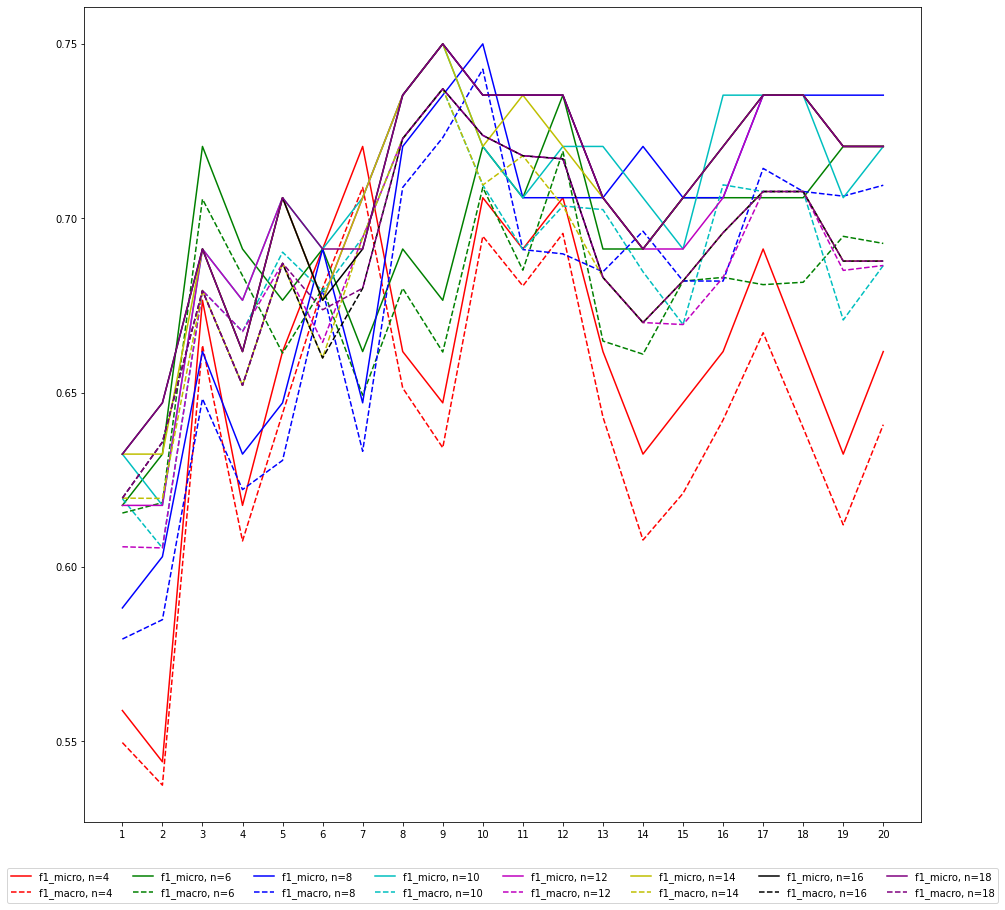

In [ ]:
from matplotlib.font_manager import FontProperties

colors=['r','g','b','c','m','y','black','purple']

fig, ax = plt.subplots(figsize=(15,15))
xax=ks
ax.set_xticks(xax)
#ax.set_ylim((0,1))

ax.set_xticklabels(xax)
for i in range(len(f1_micros)):
  ax.plot(xax, f1_micros[i],color=colors[i], label='f1_micro, n='+str(n[i]))
  ax.plot(xax, f1_macros[i],color=colors[i],linestyle="--", label='f1_macro, n='+str(n[i]))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True , ncol=8)

Παρατηρούμε πως: για n=16 και n=18 τα αποτελέσματα είναι τα ίδια. Την καλύτερη απόδοση την έχουμε για k=5 και n=16 ή 18

In [ ]:
k=list(range(1,21))
n_attrs=list(range(4,19))
knn = KNeighborsClassifier()
pca = PCA()
pipe = Pipeline(steps=[('selector', pca), ('kNN', knn)])

estimator1 = GridSearchCV(pipe, dict(selector__n_components=n_attrs, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator2 = GridSearchCV(pipe, dict(selector__n_components=n_attrs, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator1.fit(train_data, train_labels)
estimator2.fit(train_data, train_labels)
preds1 = estimator1.predict(test_data)
preds2 = estimator2.predict(test_data)

In [ ]:
print(estimator1.best_estimator_)
print(estimator1.best_params_)

Pipeline(memory=None,
         steps=[('selector',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 3, 'selector__n_components': 14}


In [ ]:
print(estimator2.best_estimator_)
print(estimator2.best_params_)

Pipeline(memory=None,
         steps=[('selector',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 3, 'selector__n_components': 14}


In [ ]:
knn_opt_preds = estimator1.best_estimator_.predict(test_data)

f1_micro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='micro')[2]
f1_macro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the CVGS:")
print("f1_micro:",f1_micro_knn_opt1 ,"f1_macro:",f1_macro_knn_opt1)

Results of the optimal knn classifier as indicated by the CVGS:
f1_micro: 0.6470588235294118 f1_macro: 0.6419996024647187


In [ ]:
estimator3 = GridSearchCV(pipe, dict(selector__n_components=[16], kNN__n_neighbors=[9]), cv=10, scoring='f1_micro', n_jobs=-1)
estimator3.fit(train_data, train_labels)
preds3 = estimator3.predict(test_data)
f1_micro_knn_opt3 = precision_recall_fscore_support(test_labels, preds3, average='micro')[2]
f1_micro_knn_opt3 = precision_recall_fscore_support(test_labels, preds3, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the graph results:")
print("f1_micro:",f1_micro_knn_opt3 ,"f1_macro:",f1_micro_knn_opt3)

Results of the optimal knn classifier as indicated by the graph results:
f1_micro: 0.6131499338249197 f1_macro: 0.6131499338249197


In [ ]:
f1_micros_opt.append(f1_micro_knn_opt1)
f1_macros_opt.append(f1_macro_knn_opt1)

**ΔΟΚΙΜΗ #ΔΕΝ ΞΕΡΩ**

In [ ]:
k= [2,3,4]
vthreshold = [0,50,100,150,200,500]
selector = VarianceThreshold()

knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('selector', selector), ('kNN', knn)])

estimator1 = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator2 = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_macro', n_jobs=-1)
estimator1.fit(train_data, train_labels)
estimator2.fit(train_data, train_labels)
preds1 = estimator1.predict(test_data)
preds2 = estimator2.predict(test_data)

print(estimator1.best_estimator_)
print(estimator1.best_params_)

print(classification_report(test_labels,preds1))

Pipeline(memory=None,
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 3, 'selector__threshold': 0}
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        36
           1       0.65      0.42      0.51        53
           2       0.47      0.46      0.47        39
           3       0.89      0.93      0.91        42

    accuracy                           0.65       170
   macro avg       0.65      0.67      0.65       170
weighted avg       0.65      0.65      0.64       170



In [ ]:
from  sklearn.preprocessing import StandardScaler
k= [2,3,4]
scaler = StandardScaler()


knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('scaler', scaler), ('kNN', knn)])

estimator1 = GridSearchCV(pipe, dict( kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator2 = GridSearchCV(pipe, dict( kNN__n_neighbors=k), cv=10, scoring='f1_macro', n_jobs=-1)
estimator1.fit(train_data, train_labels)
estimator2.fit(train_data, train_labels)
preds1 = estimator1.predict(test_data)
preds2 = estimator2.predict(test_data)

print(estimator1.best_estimator_)
print(estimator1.best_params_)

print(classification_report(test_labels,preds1))

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        36
           1       0.58      0.47      0.52        53
           2       0.41      0.38      0.39        39
           3       0.90      0.86      0.88        42

    accuracy                           0.66       170
   macro avg       0.65      0.68      0.66       170
weighted avg       0.65      0.66      0.65       170



In [ ]:
from  sklearn.preprocessing import StandardScaler
k= [2,3,4]
n_components = [15,16,17]
scaler = StandardScaler()
pca = PCA()

knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('kNN', knn)])

estimator1 = GridSearchCV(pipe, dict( pca__n_components = n_components , kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator2 = GridSearchCV(pipe, dict( pca__n_components = n_components , kNN__n_neighbors=k), cv=10, scoring='f1_macro', n_jobs=-1)
estimator1.fit(train_data, train_labels)
estimator2.fit(train_data, train_labels)
preds1 = estimator1.predict(test_data)
preds2 = estimator2.predict(test_data)

print(estimator1.best_estimator_)
print(estimator1.best_params_)

print(classification_report(test_labels,preds1))

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=17,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 3, 'pca__n_components': 17}
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        36
           1       0.58      0.47      0.52        53
           2       0.41      0.38      0.39        39
           3       0.90      0.86      0.88        42

    accuracy              

In [ ]:
knn_opt_preds = estimator1.best_estimator_.predict(test_data)

f1_micro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='micro')[2]
f1_macro_knn_opt1=precision_recall_fscore_support(test_labels, knn_opt_preds, average='macro')[2]

print("Results of the optimal knn classifier as indicated by the CVGS:")
print("f1_micro:",f1_micro_knn_opt1 ,"f1_macro:",f1_macro_knn_opt1)

Results of the optimal knn classifier as indicated by the CVGS:
f1_micro: 0.6588235294117647 f1_macro: 0.6577070645629957


In [ ]:
f1_micros_opt.append(f1_micro_knn_opt1)
f1_macros_opt.append(f1_macro_knn_opt1)

####Τελική παρουσίαση αποτελεσμάτων και παρατηρήσεις

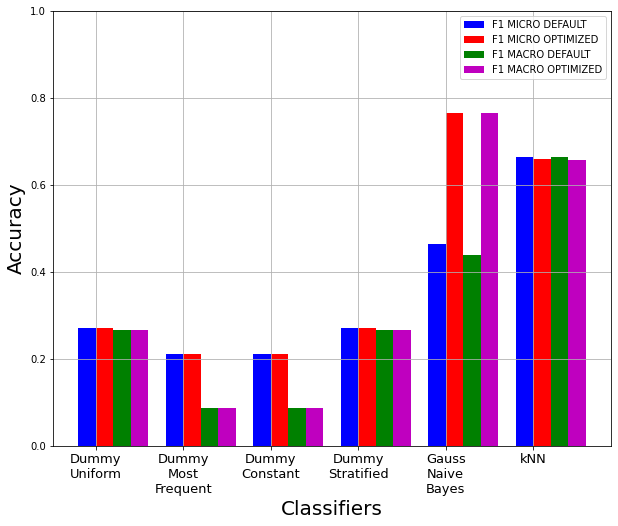

In [ ]:
#DEN EXEI TELEIWSEI AUTO AKOMA
classifiers=["Dummy\nUniform","Dummy\nMost\nFrequent","Dummy\nConstant","Dummy\nStratified","Gauss\nNaive\nBayes","kNN"]


fig, ax = plt.subplots(figsize = (10,8))
ax.grid(True)
xax=np.arange(len(classifiers))
ax.set_xticks(xax)
ax.set_xticklabels(classifiers, size=13)
ax.set_xlabel('Classifiers', size=20)
ax.set_ylim(0,1)
ax.set_ylabel("Accuracy", size=20)

ax.bar(xax-0.2, f1_micros_def, label='F1 MICRO DEFAULT',align='edge',width=0.2, color='blue' )
ax.bar(xax,f1_micros_opt, label='F1 MICRO OPTIMIZED',align='edge',width=0.2, color='red' )
ax.bar(xax + 0.2, f1_macros_def, label='F1 MACRO DEFAULT',align='edge',width=0.2, color='green' )
ax.bar(xax +0.4, f1_macros_opt, label='F1 MACRO OPTIMIZED',align='edge',width=0.2, color='m' )
plt.legend()
